# Analyzing Positive and Negative of Core Values and Benefits texts
-------------------

> <i>Description: In this notebook, we research if there are any significant patterns or insights in Pros and cons of reviews data.</i>

Input Files: 
1) text_data_classes_sentiment.xlsx
2) departments_seniority.csv

Output:
1) reviews_positive.csv
2) reviews_negative.csv


Categories:
* Diversity & Equity & Inclusion 

* Authenticity 
* Collaboration & Teamwork & Social Culture
* Creativity and Innovation
* Professional Development and Continuous Learning
* Youthful Spirit
* Digital Transformation & Process Management
* Leadership & Communication", "Fashion and Lifestyle Benefits
* Health and Well-being
* Work-Life Balance & Flexibility
* Mobility & Accessibility
* Financial Compensation & Benefits
* Device Leasing and Corporate Benefits
* Social and Recreational Benefits

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl
from collections import Counter

c:\Users\baner\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
category_map = ["Diversity & Equity & Inclusion", "Authenticity", "Collaboration & Teamwork & Social Culture", 
                "Creativity and Innovation", "Professional Development and Continuous Learning", "Youthful Spirit", 
                "Digital Transformation & Process Management", "Leadership & Communication", "Fashion and Lifestyle Benefits", 
                "Health and Well-being", "Work-Life Balance & Flexibility", "Mobility & Accessibility", 
                "Financial Compensation & Benefits", "Device Leasing and Corporate Benefits", "Social and Recreational Benefits"]

## File readin and processing

* Reading in the input files.
* merging the 2 files to leverage correctly mapped business_function_department and cleaned_position.
* going through the unique values for each feature to get better idea.


In [3]:
reviews = pd.read_excel("text_data_classes_sentiment.xlsx")
reviews =reviews.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

department_position_map = pd.read_csv("departments_seniority.csv")
department_position_map = department_position_map.drop_duplicates(subset='reviewId', keep='first')

merged_df = reviews.merge(department_position_map, left_on='uuid', right_on='reviewId', how='left')

reviews['position'] = merged_df['cleaned_position']
reviews['department'] = merged_df['business_function_department']
print(reviews.shape)

reviews.loc[reviews['department'] == 'Other', 'department'] = 'other'

print(reviews['year'].unique())
print(reviews['position'].unique())
print(reviews['position_code'].unique())
print(reviews['department'].unique())
print(reviews['country'].unique())


(2449, 23)
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2014 2015 2008 2013 2012
 2011 2010 2009]
['employee' 'Junior' 'other' 'manager']
[ 1.  2.  3.  4.  5. nan  6.  7.]
['Corporate' 'Logistics' 'Retail' 'other']
['Germany' 'Unknown' nan 'USA' 'Netherlands' 'Canada' 'Belgium' 'Brazil'
 'Spain' 'Mexico' 'France' 'England' 'Ireland' 'Austria' 'Scotland'
 'Turkey' 'Australia' 'UAE' 'China' 'Switzerland' 'Sweden' 'Portugal'
 'India' 'Argentina' 'Norway']


### Filtering on years and Missing value treatment

Only keeping the data since 2019, and imputing the missing rows in pros and pros_class with empty string

In [4]:
reviews_pros = reviews[reviews['year']>2018][['uuid', 'date', 'year', 'position', 'department', 'pros', 'country', 'file', 'pros_class']]
reviews_pros.fillna({'pros': '', 'pros_class': ''}, inplace=True)
print(reviews_pros.info())

reviews_cons = reviews[reviews['year']>2018][['uuid', 'date', 'year', 'position', 'department', 'cons', 'country', 'file', 'cons_class']]
reviews_cons.fillna({'cons': '', 'cons_class': ''}, inplace=True)
print(reviews_cons.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1891 entries, 0 to 2448
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uuid        1891 non-null   object
 1   date        1891 non-null   object
 2   year        1891 non-null   int64 
 3   position    1891 non-null   object
 4   department  1891 non-null   object
 5   pros        1891 non-null   object
 6   country     1891 non-null   object
 7   file        1891 non-null   object
 8   pros_class  1891 non-null   object
dtypes: int64(1), object(8)
memory usage: 147.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1891 entries, 0 to 2448
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uuid        1891 non-null   object
 1   date        1891 non-null   object
 2   year        1891 non-null   int64 
 3   position    1891 non-null   object
 4   department  1891 non-null   object
 5   cons        1891

## Analysis of Core Values and Benefits across different features 

In [5]:
def plot_value_counts(df, column_name, size = (4,2)):
    # Calculate the value counts for the specified column
    value_counts = df[column_name].value_counts()

    # Filter out anything that has less than 10 reviews
    value_counts = value_counts[value_counts >= 10]
    # Create the bar plot
    plt.figure(figsize=size)
    value_counts.plot(kind='bar', color='teal')
    
    # Add title and labels
    plt.title(f'Value Counts for {column_name}', fontsize=16)
    plt.xlabel(f'{column_name}', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Display the plot
    plt.xticks(rotation=45)
    plt.show()

### Distribution of Features Positive Categories

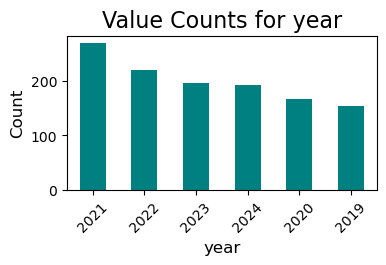

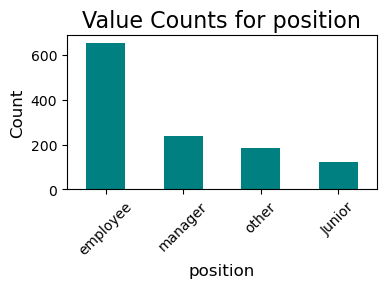

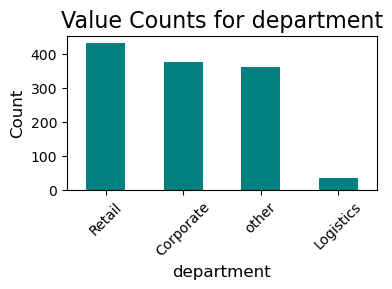

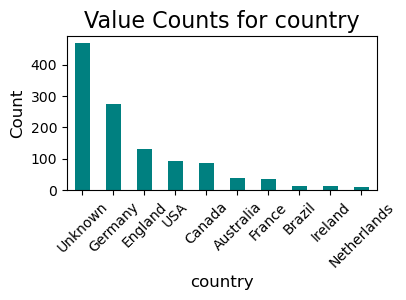

In [6]:
plot_value_counts(reviews_pros[reviews_pros['pros_class'] != ''], 'year')
plot_value_counts(reviews_pros[reviews_pros['pros_class'] != ''], 'position')
plot_value_counts(reviews_pros[reviews_pros['pros_class'] != ''], 'department')
plot_value_counts(reviews_pros[reviews_pros['pros_class'] != ''], 'country')

### Distribution of Features Negative Categories

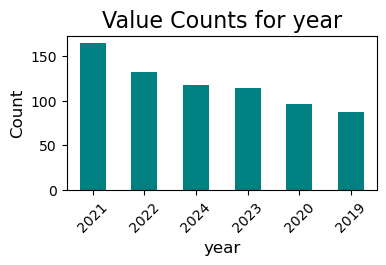

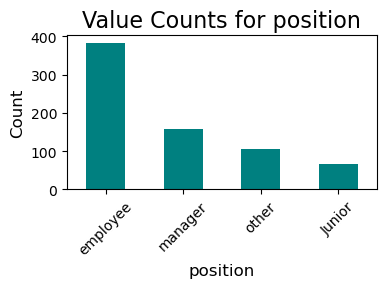

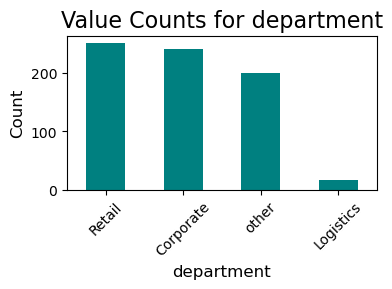

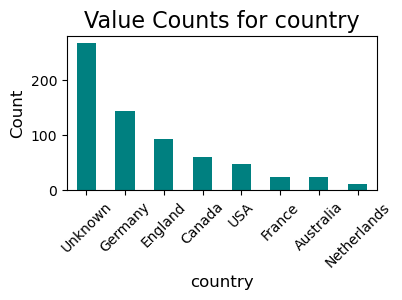

In [7]:
plot_value_counts(reviews_cons[reviews_cons['cons_class'] != ''], 'year')
plot_value_counts(reviews_cons[reviews_cons['cons_class'] != ''], 'position')
plot_value_counts(reviews_cons[reviews_cons['cons_class'] != ''], 'department')
plot_value_counts(reviews_cons[reviews_cons['cons_class'] != ''], 'country')

In [8]:
reviews_pros.to_csv('reviews_positive.csv', index= False)
reviews_cons.to_csv('reviews_negative.csv', index= False)

In [9]:
reviews_pros =pd.read_csv('reviews_positive.csv')
reviews_cons =pd.read_csv('reviews_negative.csv')


### Proportion of Positive & Negative mentions of Core Value & Benefits 

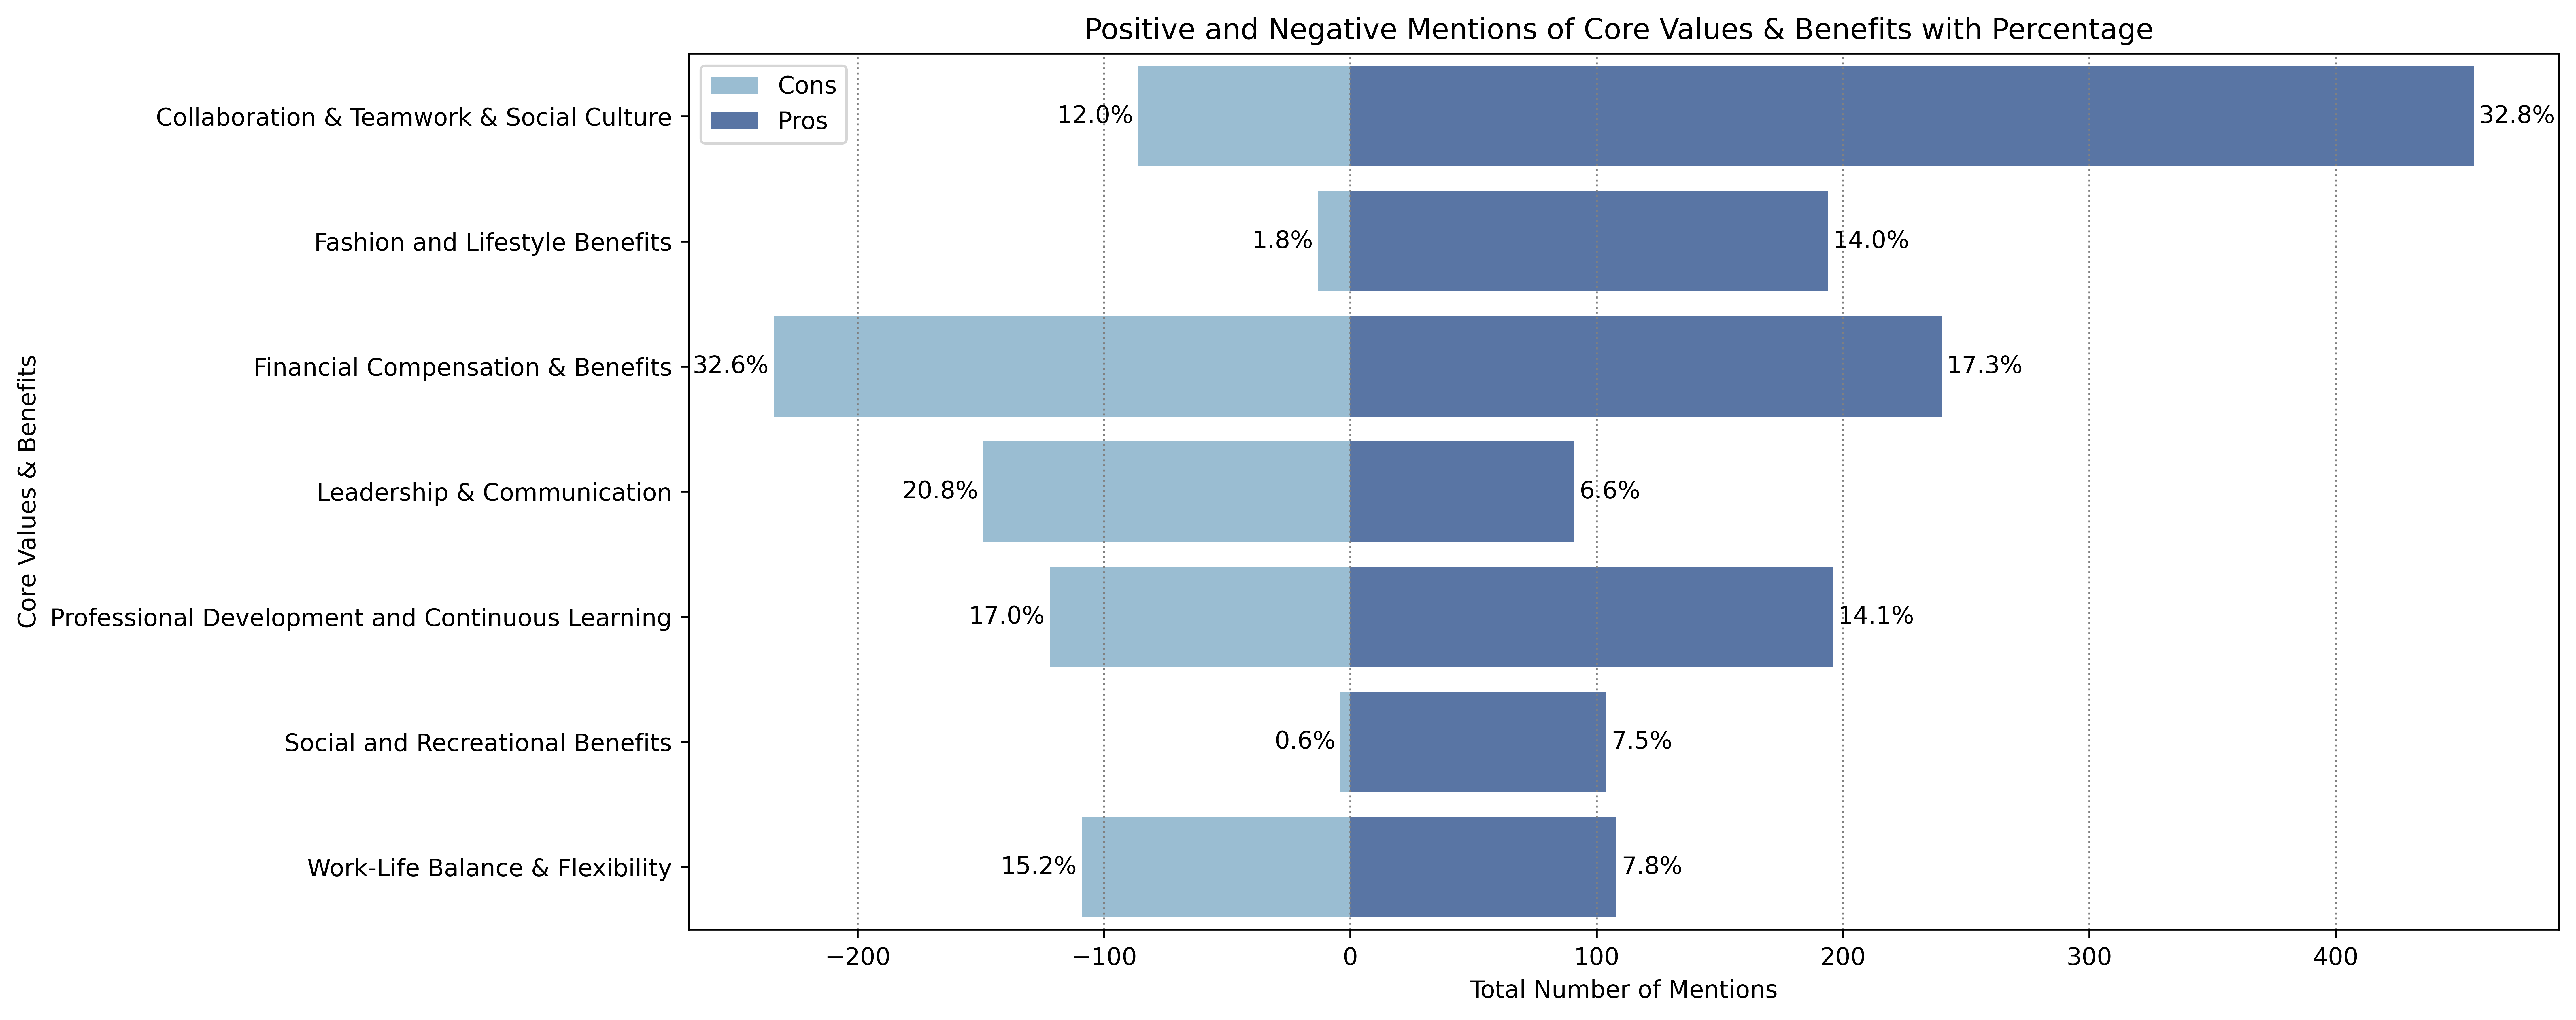

In [18]:
# Deconstruct pros_class and cons_class and filter categories based on category_map
pros_class_individual = reviews_pros['pros_class'].dropna().str.split(',').explode().str.strip()
cons_class_individual = reviews_cons['cons_class'].dropna().str.split(',').explode().str.strip()

# Filter only those categories that exist in the category_map
pros_class_filtered = pros_class_individual[pros_class_individual.isin(category_map)]
cons_class_filtered = cons_class_individual[cons_class_individual.isin(category_map)]

# Calculate frequency for both pros and cons
pros_class_counts = pros_class_filtered.value_counts()
cons_class_counts = cons_class_filtered.value_counts()

# Combine pros and cons counts for filtering
combined_counts = pros_class_counts.add(cons_class_counts, fill_value=0)

# Apply mention threshold filter
mention_threshold = 100  # Variable to limit categories based on the number of mentions
pros_class_counts_filtered = pros_class_counts[combined_counts >= mention_threshold]
cons_class_counts_filtered = cons_class_counts[combined_counts >= mention_threshold]

# Calculate percentage of each category relative to total mentions
total_pros_mentions = pros_class_counts_filtered.sum()
total_cons_mentions = cons_class_counts_filtered.sum()

# Re-align pros and cons by combining both into a single DataFrame to ensure matching categories
combined_df = pd.DataFrame({
    'pros_count': pros_class_counts_filtered,
    'cons_count': cons_class_counts_filtered
}).fillna(0)

# Recalculate percentages to ensure alignment between pros and cons
combined_df['pros_percent'] = (combined_df['pros_count'] / total_pros_mentions) * 100
combined_df['cons_percent'] = (combined_df['cons_count'] / total_cons_mentions) * 100

# Create the divergent plot
fig, ax = plt.subplots(figsize=(15, 6), dpi = 600)

# Define color variables
color_pros = '#4c72b0'  # Shade of blue for pros
color_cons = '#91bfdb'  # Lighter shade of blue for cons

# Plot cons on the left (negative values) and pros on the right, ensuring alignment
sns.barplot(x=-combined_df['cons_count'], y=combined_df.index, color=color_cons, label='Cons', ax=ax)
sns.barplot(x=combined_df['pros_count'], y=combined_df.index, color=color_pros, label='Pros', ax=ax)

# Add percentage as text annotations in front of each bar for cons and pros
for i, (value, percent) in enumerate(zip(combined_df['cons_count'], combined_df['cons_percent'])):
    ax.text(-value - 2, i, f'{percent:.1f}%', va='center', ha='right', color='black')  # Cons values on the left

for i, (value, percent) in enumerate(zip(combined_df['pros_count'], combined_df['pros_percent'])):
    ax.text(value + 2, i, f'{percent:.1f}%', va='center', ha='left', color='black')  # Pros values on the right

# Add labels and title
ax.set_xlabel('Total Number of Mentions')
ax.set_ylabel('Core Values & Benefits')
ax.set_title('Positive and Negative Mentions of Core Values & Benefits with Percentage ')
ax.legend()
plt.grid(True, which='both', axis='x', linestyle=':', color='gray')

# Display the plot
plt.tight_layout()
plt.show()


### Benchmark Analysis of Positive and Negative Mentions Across Departments for Top 5 Negative Core Values

In [21]:
def category_benchmarking_across_department(reviews_pros,reviews_cons, category):
    category_reviews_pros = reviews_pros[reviews_pros['pros_class'].str.contains(category, na=False)]
    category_reviews_cons = reviews_cons[reviews_cons['cons_class'].str.contains(category, na=False)]

    pros_mentions = category_reviews_pros.groupby('department').size()
    cons_mentions = category_reviews_cons.groupby('department').size()

    valid_departments = reviews_pros['department'].value_counts().index.tolist()

    pros_proportion = pros_mentions[valid_departments] / reviews_pros[reviews_pros['department'].isin(valid_departments)]['department'].value_counts() * 100
    cons_proportion = cons_mentions[valid_departments] / reviews_cons[reviews_cons['department'].isin(valid_departments)]['department'].value_counts() * 100

    combined_proportion = pd.DataFrame({
        'Pros': pros_proportion,
        'Cons': -cons_proportion
    }).fillna(0)

    # Plot the combined divergent bar plot
    plt.figure(figsize=(10, 6), dpi = 600)
    combined_proportion[['Pros', 'Cons']].plot(kind='barh', stacked=True, color=['#4c72b0', '#91bfdb'], figsize=(10, 5))

    # Adding average lines
    overall_pros_avg = (len(category_reviews_pros) / len(reviews_pros)) * 100
    overall_cons_avg = (len(category_reviews_cons) / len(reviews_cons)) * 100
    plt.axvline(overall_pros_avg, color='teal', linestyle='--', label=f'Overall Pros Avg')
    plt.axvline(-overall_cons_avg, color='salmon', linestyle='--', label=f'Overall Cons Avg')

    # Formatting the plot
    plt.title(f'{category} across Department', fontsize=14)
    plt.xlabel('Proportion of Mentions (%)', fontsize=12)
    plt.ylabel('Department', fontsize=12)
    plt.axvline(0, color='black', linewidth=1)
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()


<Figure size 6000x3600 with 0 Axes>

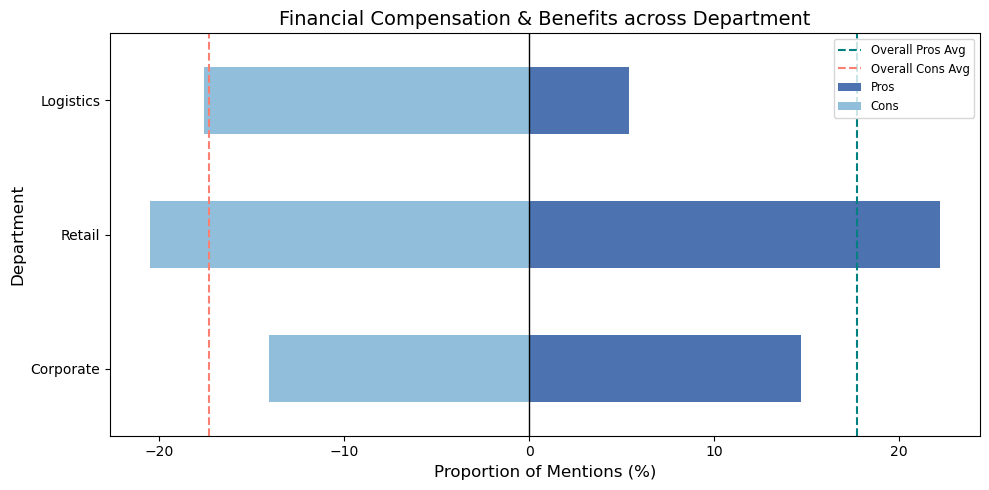

<Figure size 6000x3600 with 0 Axes>

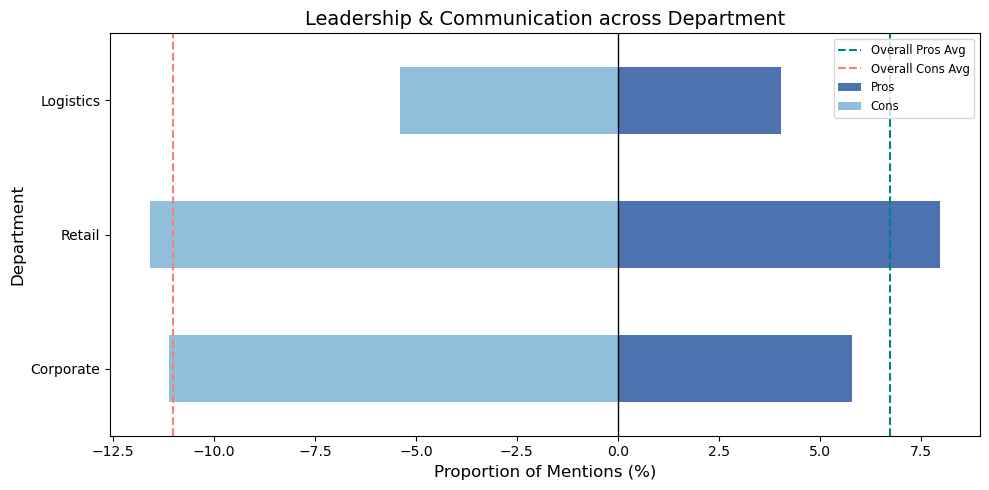

<Figure size 6000x3600 with 0 Axes>

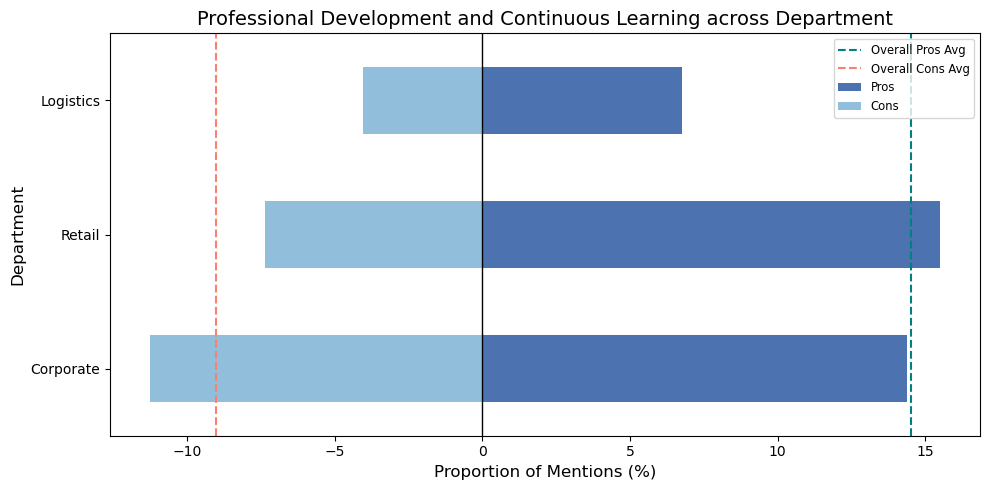

<Figure size 6000x3600 with 0 Axes>

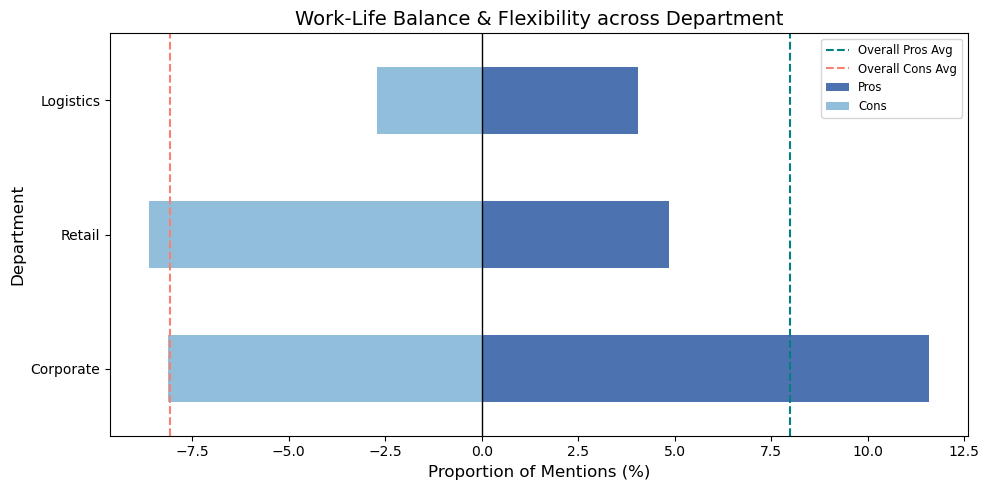

<Figure size 6000x3600 with 0 Axes>

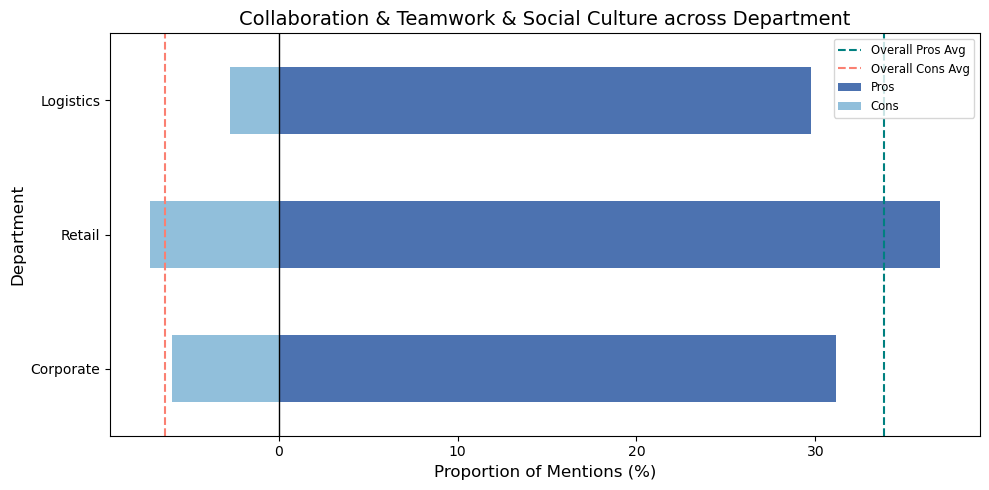

In [22]:
category_benchmarking_across_department(reviews_pros,reviews_cons, "Financial Compensation & Benefits")
category_benchmarking_across_department(reviews_pros,reviews_cons, "Leadership & Communication")
category_benchmarking_across_department(reviews_pros,reviews_cons, "Professional Development and Continuous Learning")
category_benchmarking_across_department(reviews_pros,reviews_cons, "Work-Life Balance & Flexibility")
category_benchmarking_across_department(reviews_pros,reviews_cons, "Collaboration & Teamwork & Social Culture")

In [13]:
reviews_pros = reviews_pros[~reviews_pros['department'].isin(['other'])]
reviews_cons = reviews_cons[~reviews_cons['department'].isin(['other'])]

reviews_pros = reviews_pros[~reviews_pros['position'].isin(['other'])]
reviews_cons = reviews_cons[~reviews_cons['position'].isin(['other'])]

print(reviews_pros.shape)
print(reviews_cons.shape)

(1351, 9)
(1351, 9)


### Benchmark Analysis of Positive and Negative Mentions Across Position for Top 5 Negative Core Values

In [25]:
def category_benchmarking_across_position(reviews_pros,reviews_cons, category, corner = 'upper left'):

    if isinstance(category, list):
    # If it's a list, create a regex to match any category
        category_regex = '|'.join([re.escape(cat) for cat in category])

    else:
        # If it's a single string, treat it as a single category
        category_regex = category

    
    category_reviews_pros = reviews_pros[reviews_pros['pros_class'].str.contains(category_regex, na=False)]
    category_reviews_cons = reviews_cons[reviews_cons['cons_class'].str.contains(category_regex, na=False)]

    pros_mentions = category_reviews_pros.groupby('position').size()
    cons_mentions = category_reviews_cons.groupby('position').size()

    valid_departments = reviews_pros['position'].value_counts().index.tolist()

    pros_proportion = pros_mentions[valid_departments] / reviews_pros[reviews_pros['position'].isin(valid_departments)]['position'].value_counts() * 100
    cons_proportion = cons_mentions[valid_departments] / reviews_cons[reviews_cons['position'].isin(valid_departments)]['position'].value_counts() * 100

    combined_proportion = pd.DataFrame({
        'Pros': pros_proportion,
        'Cons': -cons_proportion
    }).fillna(0)

    # Plot the combined divergent bar plot
    plt.figure(figsize=(10, 6), dpi=600)
    combined_proportion[['Pros', 'Cons']].plot(kind='barh', stacked=True, color=['#4c72b0', '#91bfdb'], figsize=(10, 5))

    # Adding average lines
    overall_pros_avg = (len(category_reviews_pros) / len(reviews_pros)) * 100
    overall_cons_avg = (len(category_reviews_cons) / len(reviews_cons)) * 100
    plt.axvline(overall_pros_avg, color='teal', linestyle='--', label=f'Overall Pros Avg')
    plt.axvline(-overall_cons_avg, color='salmon', linestyle='--', label=f'Overall Cons Avg')

    if isinstance(category, list):
    # If it's a list, create a regex to match any category
        s = len(category)
        category_regex = "Top " + str(s) + " Core Values with most negatives"

    # Formatting the plot
    plt.title(f'{category_regex} across Position', fontsize=14)
    plt.xlabel('Proportion of Mentions (%)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.axvline(0, color='black', linewidth=1)
    #bbox_to_anchor=(1.22, 1),
    plt.legend(loc=corner,  fontsize='small')
    plt.tight_layout()
    plt.show()


<Figure size 6000x3600 with 0 Axes>

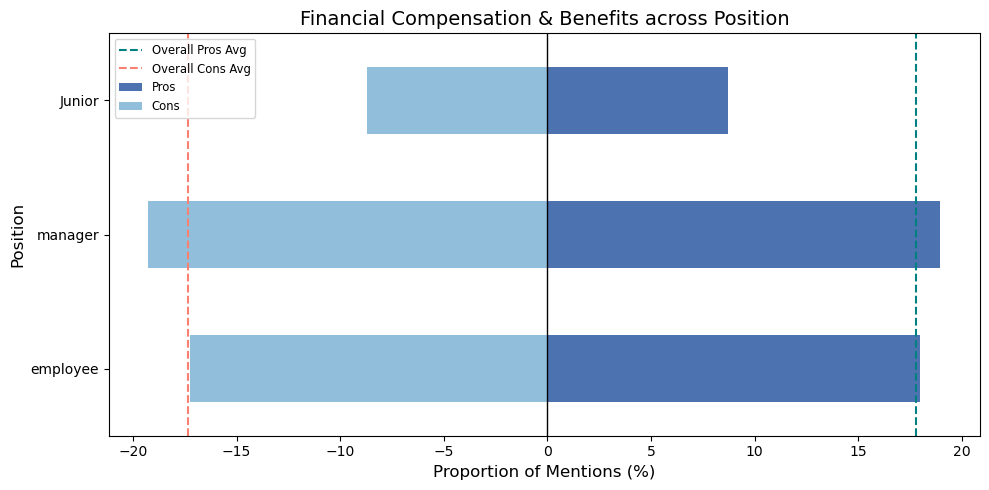

<Figure size 6000x3600 with 0 Axes>

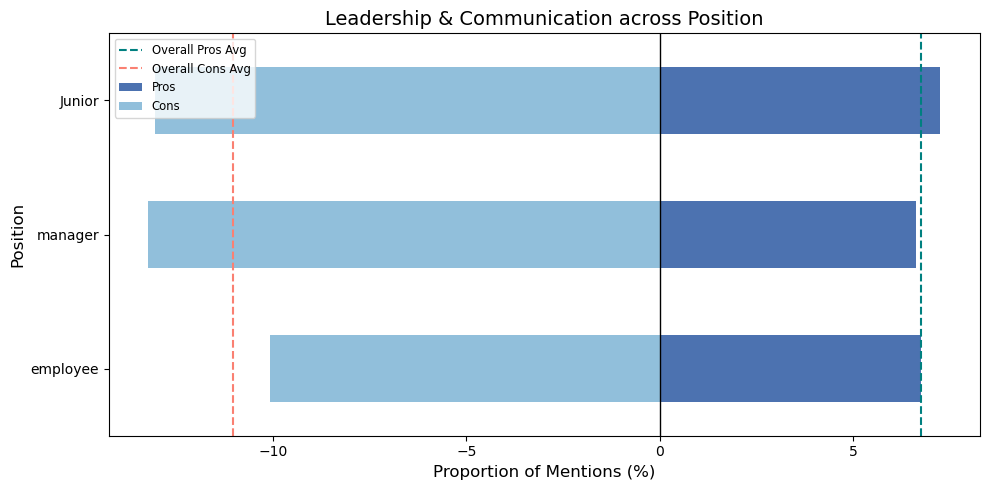

<Figure size 6000x3600 with 0 Axes>

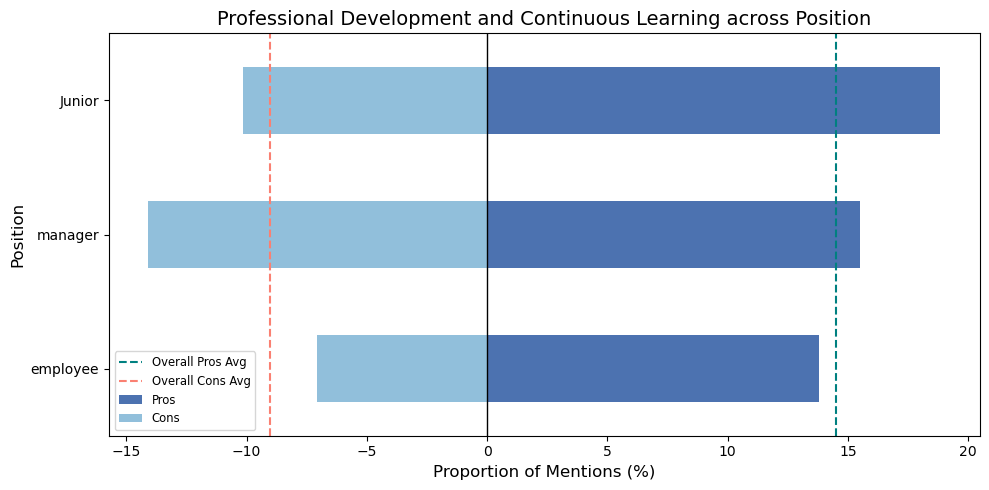

<Figure size 6000x3600 with 0 Axes>

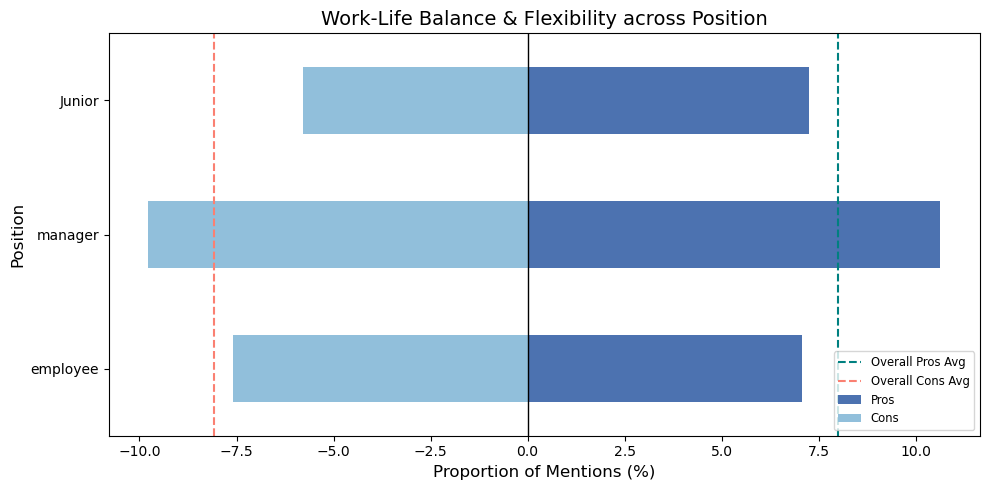

<Figure size 6000x3600 with 0 Axes>

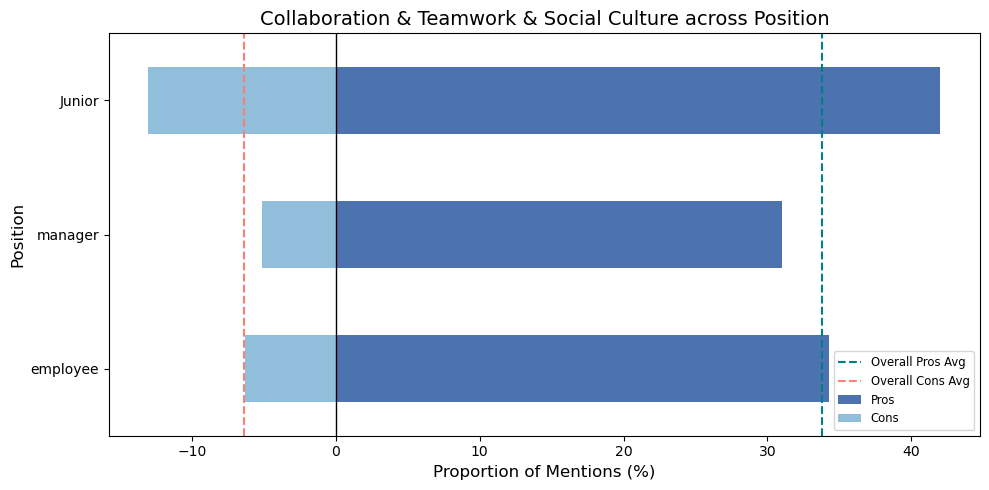

In [26]:
category_benchmarking_across_position(reviews_pros,reviews_cons, "Financial Compensation & Benefits",corner = 'upper left')
category_benchmarking_across_position(reviews_pros,reviews_cons, "Leadership & Communication", corner = 'upper left')
category_benchmarking_across_position(reviews_pros,reviews_cons, "Professional Development and Continuous Learning", corner = 'lower left')
category_benchmarking_across_position(reviews_pros,reviews_cons, "Work-Life Balance & Flexibility", corner = 'lower right')
category_benchmarking_across_position(reviews_pros,reviews_cons, "Collaboration & Teamwork & Social Culture", corner = 'lower right')

## Analysing Positive and Negative mentions of Topics acorss Department and Position

In [32]:

def plot_divergent_pros_cons(positive_reviews, negative_reviews, category, department, mention_threshold=100):

    filtered_pros = positive_reviews[
        (positive_reviews['pros_class'].str.contains(category, na=False)) &
        (positive_reviews['department'] == department)
    ]
    filtered_cons = negative_reviews[
        (negative_reviews['cons_class'].str.contains(category, na=False)) &
        (negative_reviews['department'] == department)
    ]

    # Group by position and count occurrences for pros and cons
    pros_position_counts = filtered_pros['position'].value_counts()
    cons_position_counts = filtered_cons['position'].value_counts()

    # Combine pros and cons counts for filtering
    combined_counts = pros_position_counts.add(cons_position_counts, fill_value=0)

    # Apply mention threshold filter
    pros_position_counts = pros_position_counts[combined_counts >= mention_threshold]
    cons_position_counts = cons_position_counts[combined_counts >= mention_threshold]

    # Calculate total mentions for pros and cons
    total_pros_mentions = pros_position_counts.sum()
    total_cons_mentions = cons_position_counts.sum()

    # Calculate percentages for each position
    pros_position_percent = (pros_position_counts / (total_pros_mentions + total_cons_mentions)) * 100
    cons_position_percent = (cons_position_counts / (total_pros_mentions + total_cons_mentions)) * 100

    # Create the divergent plot
    fig, ax = plt.subplots(figsize=(8,5), dpi=600)

    # Plot cons on the left (negative values) and pros on the right
    sns.barplot(x=-cons_position_counts, y=cons_position_counts.index, color='#91bfdb', label='Cons', ax=ax)
    sns.barplot(x=pros_position_counts, y=pros_position_counts.index, color='#4c72b0', label='Pros', ax=ax)

    for i, (value, percent) in enumerate(zip(cons_position_counts, cons_position_percent)):
        ax.text(-value + 1, i, f'{percent:.1f}%', va='center', ha='left', color='black')  # Cons values on the left

    for i, (value, percent) in enumerate(zip(pros_position_counts, pros_position_percent)):
        ax.text(value - 1, i, f'{percent:.1f}%', va='center', ha='right', color='black')  # Pros values on the right

    # Add labels and title
    ax.set_xlabel('Number of Mentions')
    ax.set_ylabel('Position')
    ax.set_title(f'{category} in {department} Department')
    ax.legend()

    # Add gridlines
    plt.grid(True, which='both', axis='x', linestyle='--', color='gray')

    # Display the plot
    plt.tight_layout()
    plt.show()



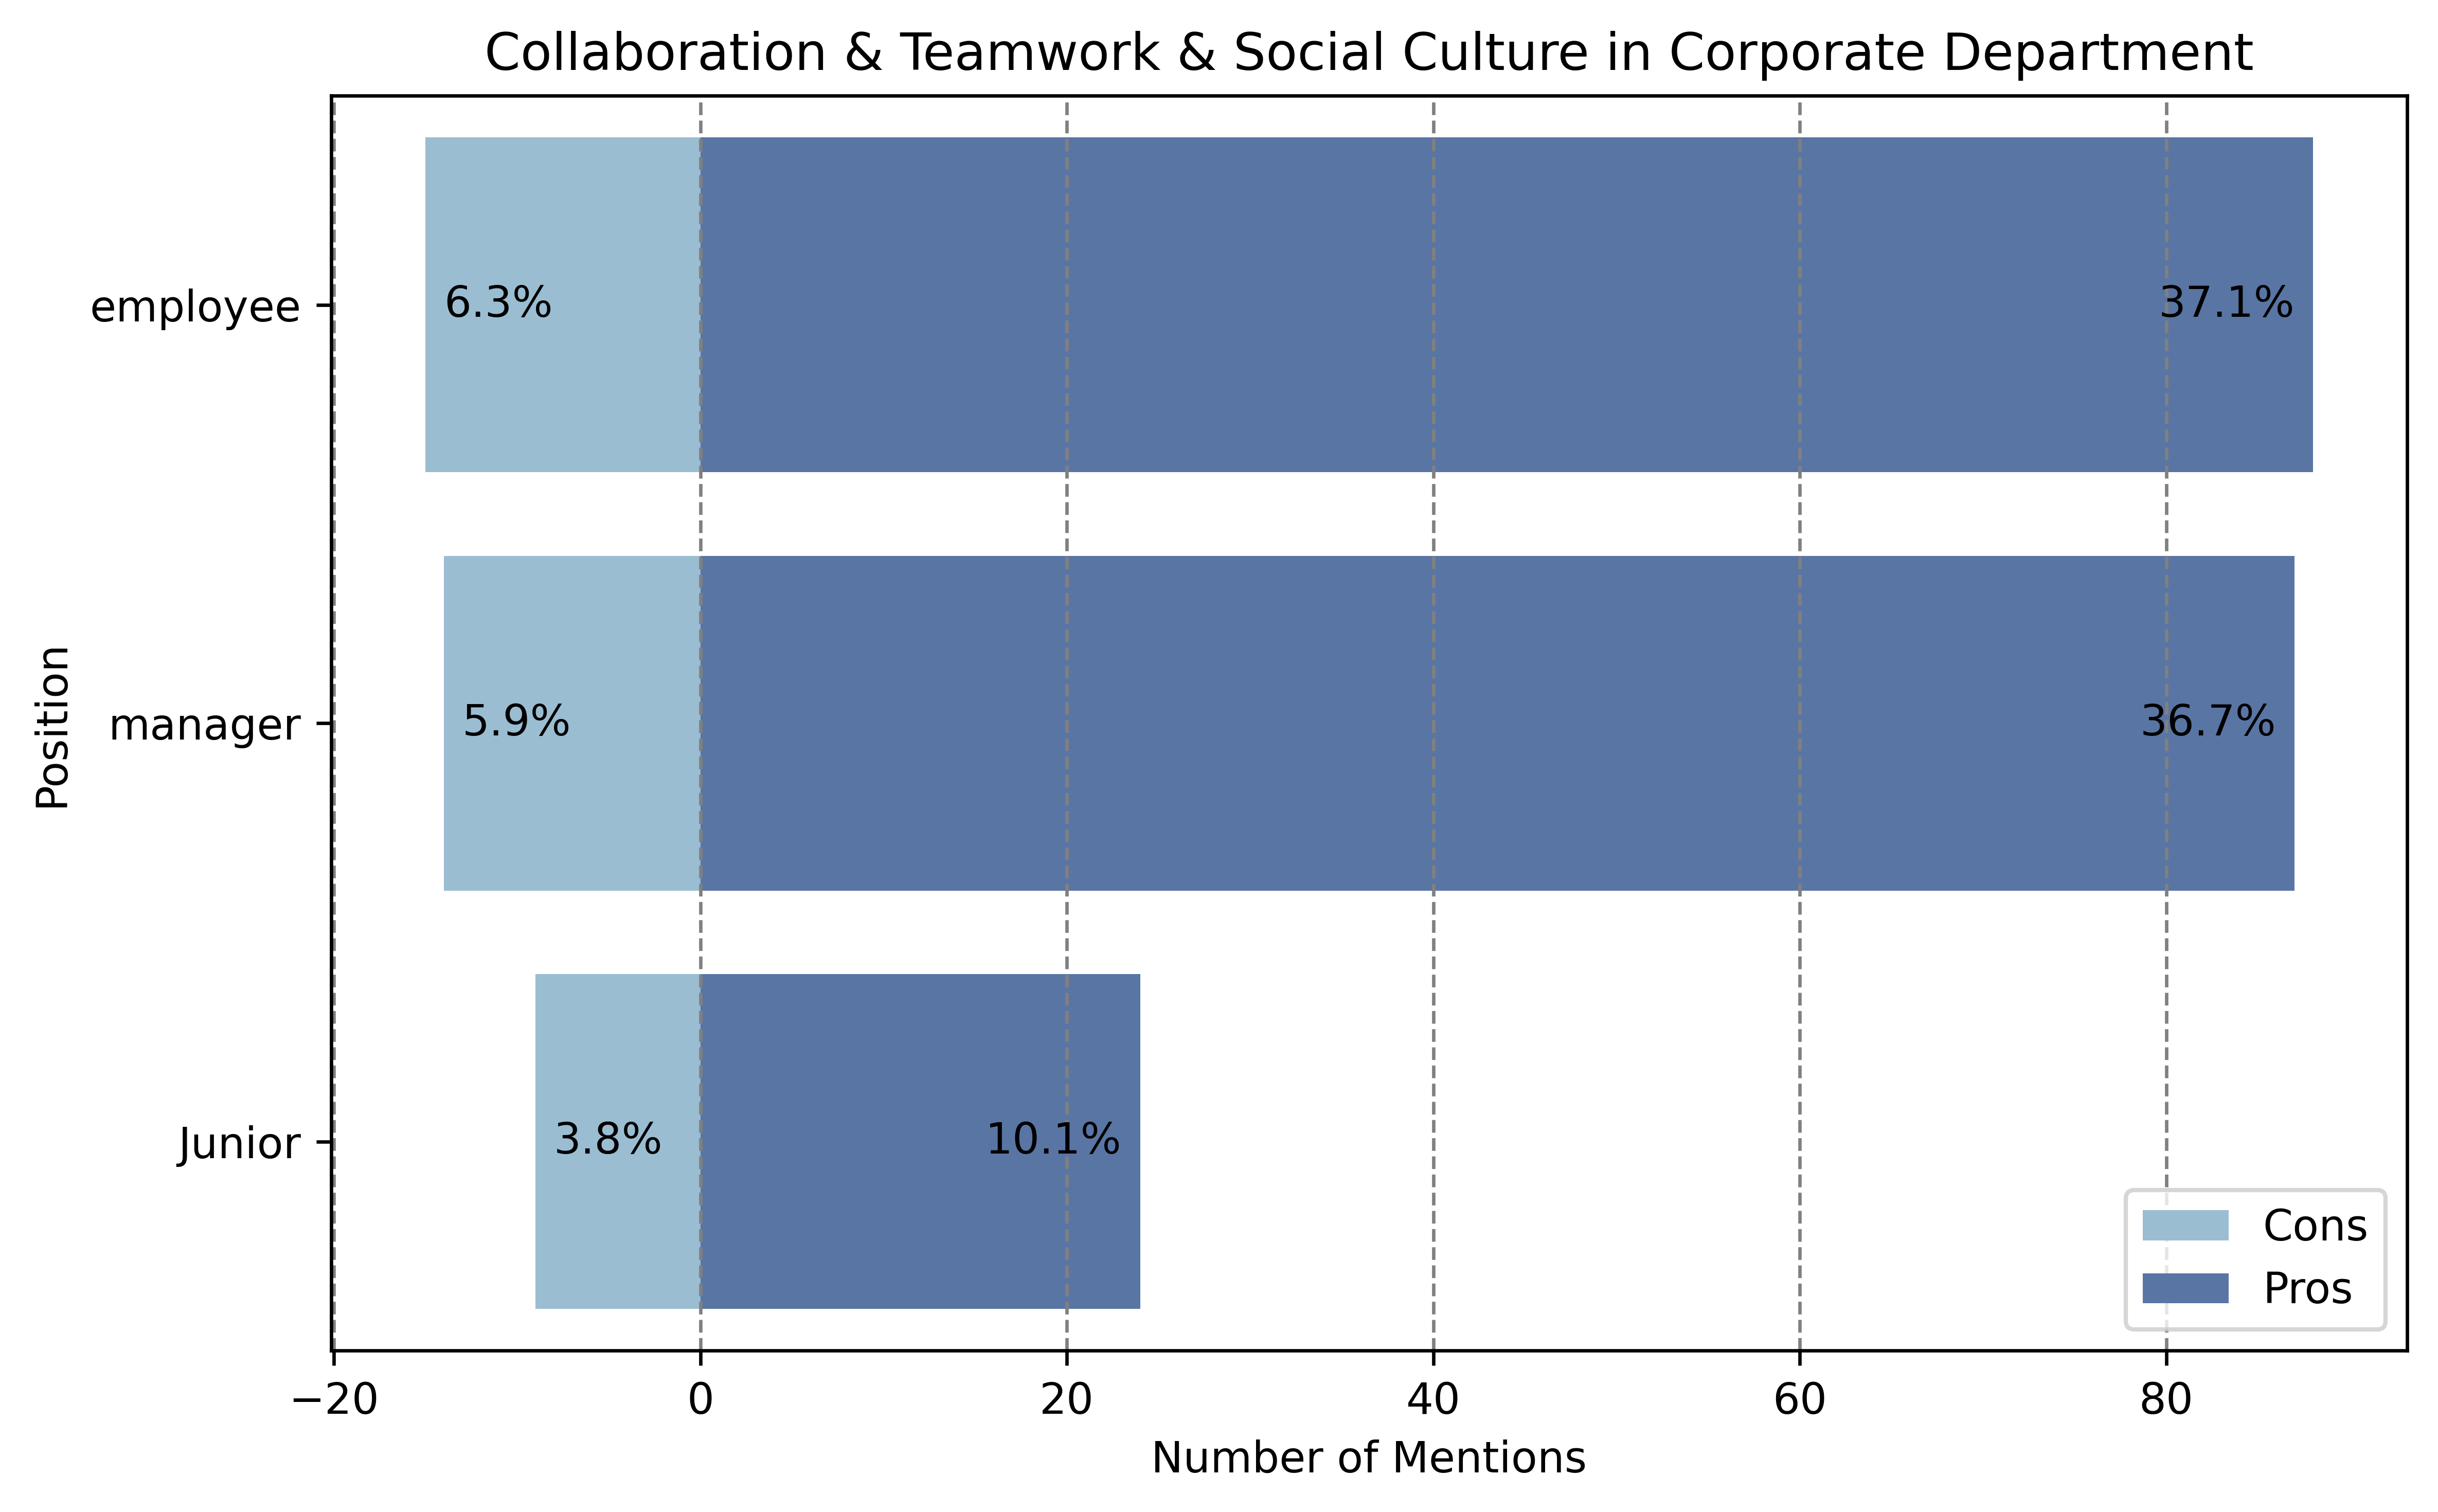

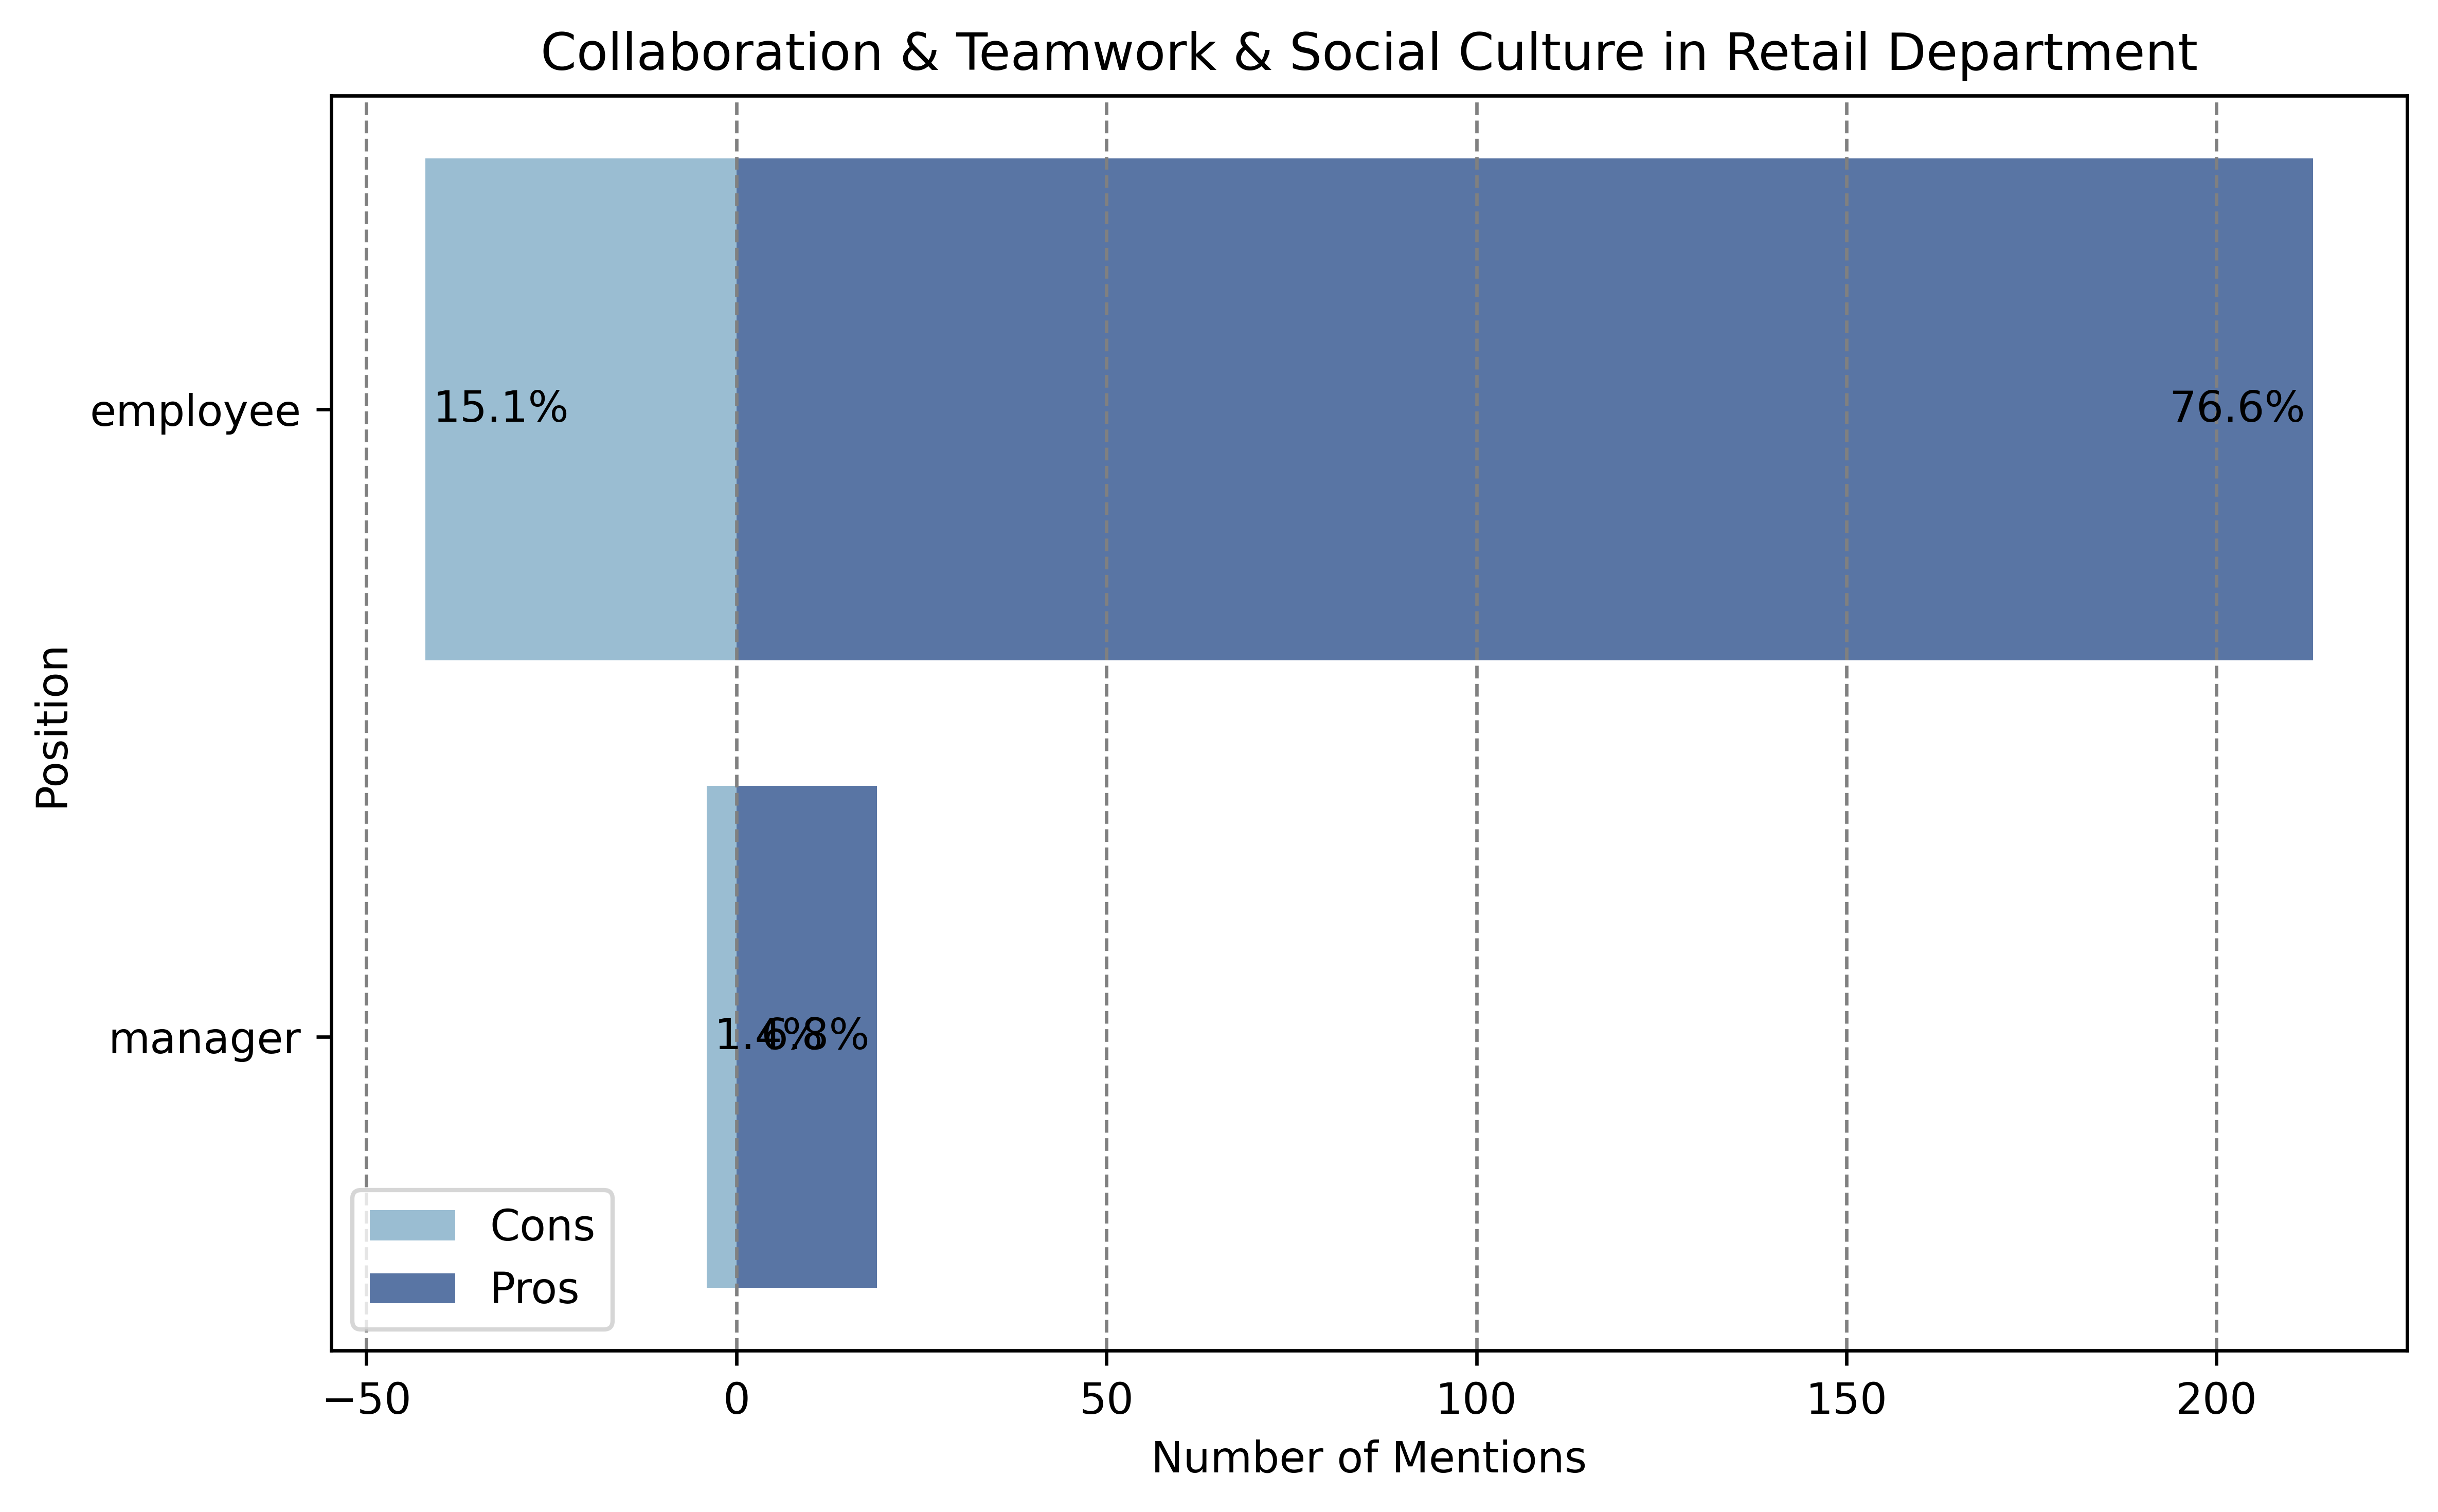

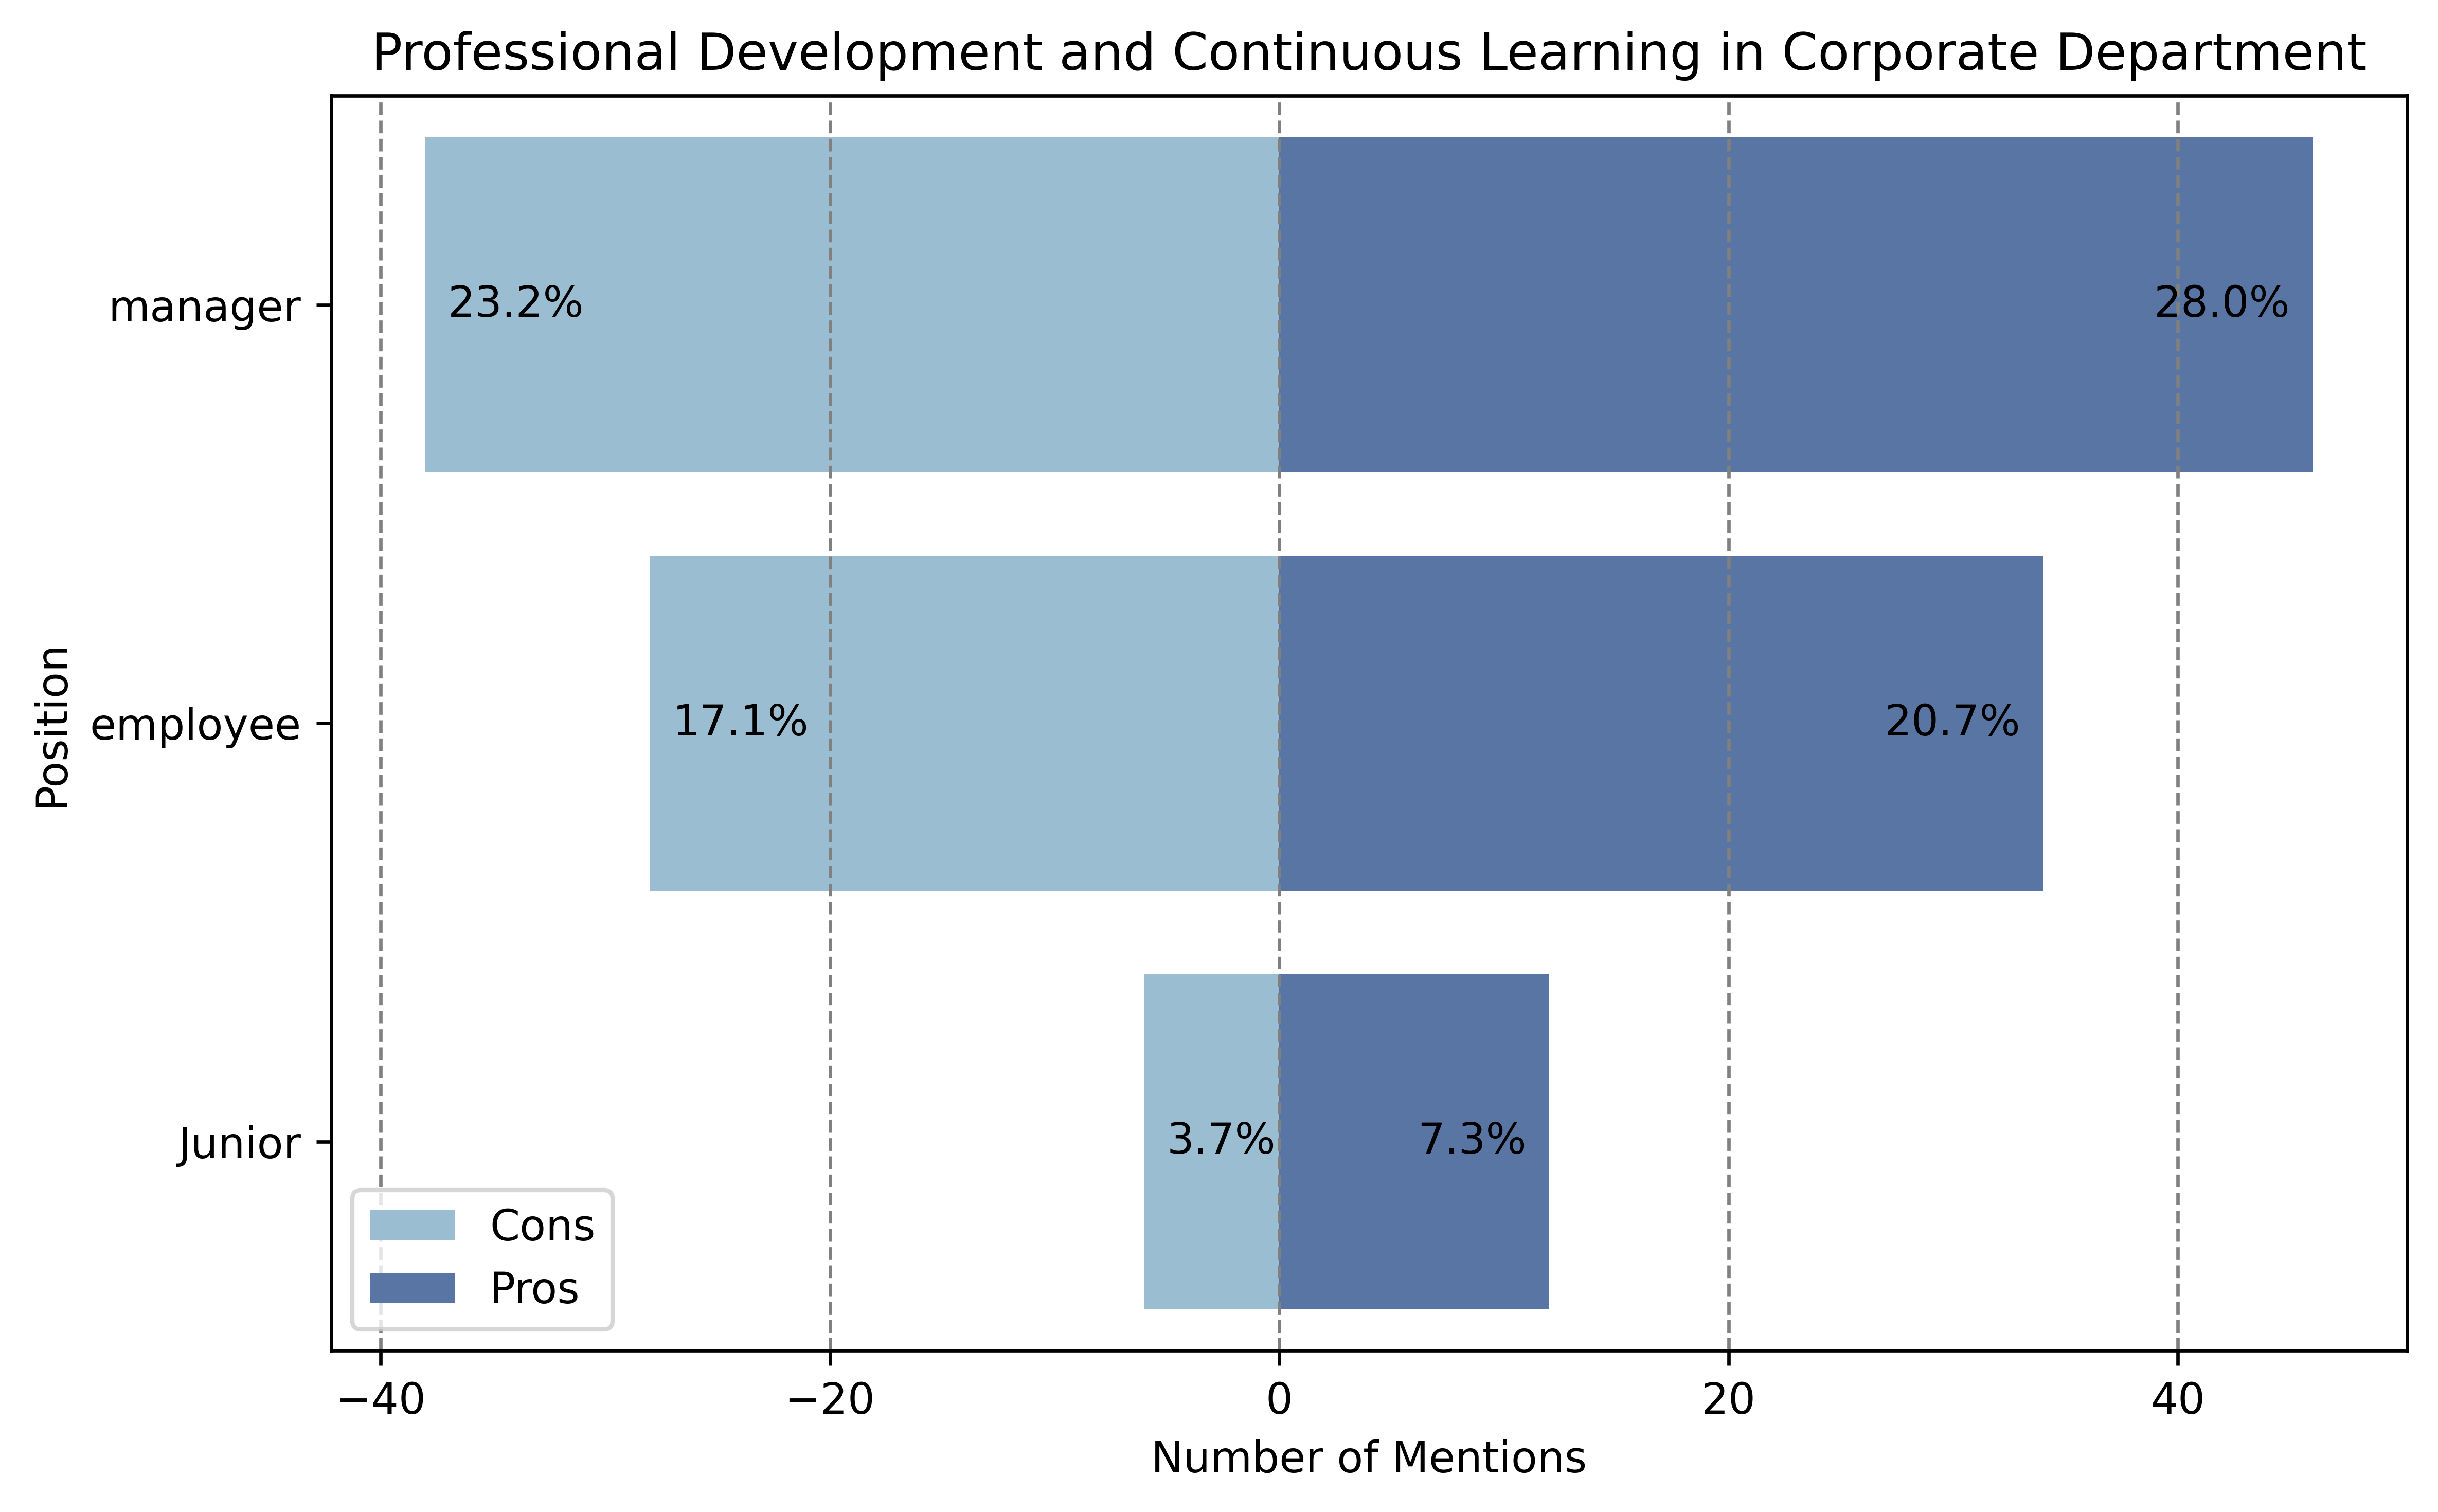

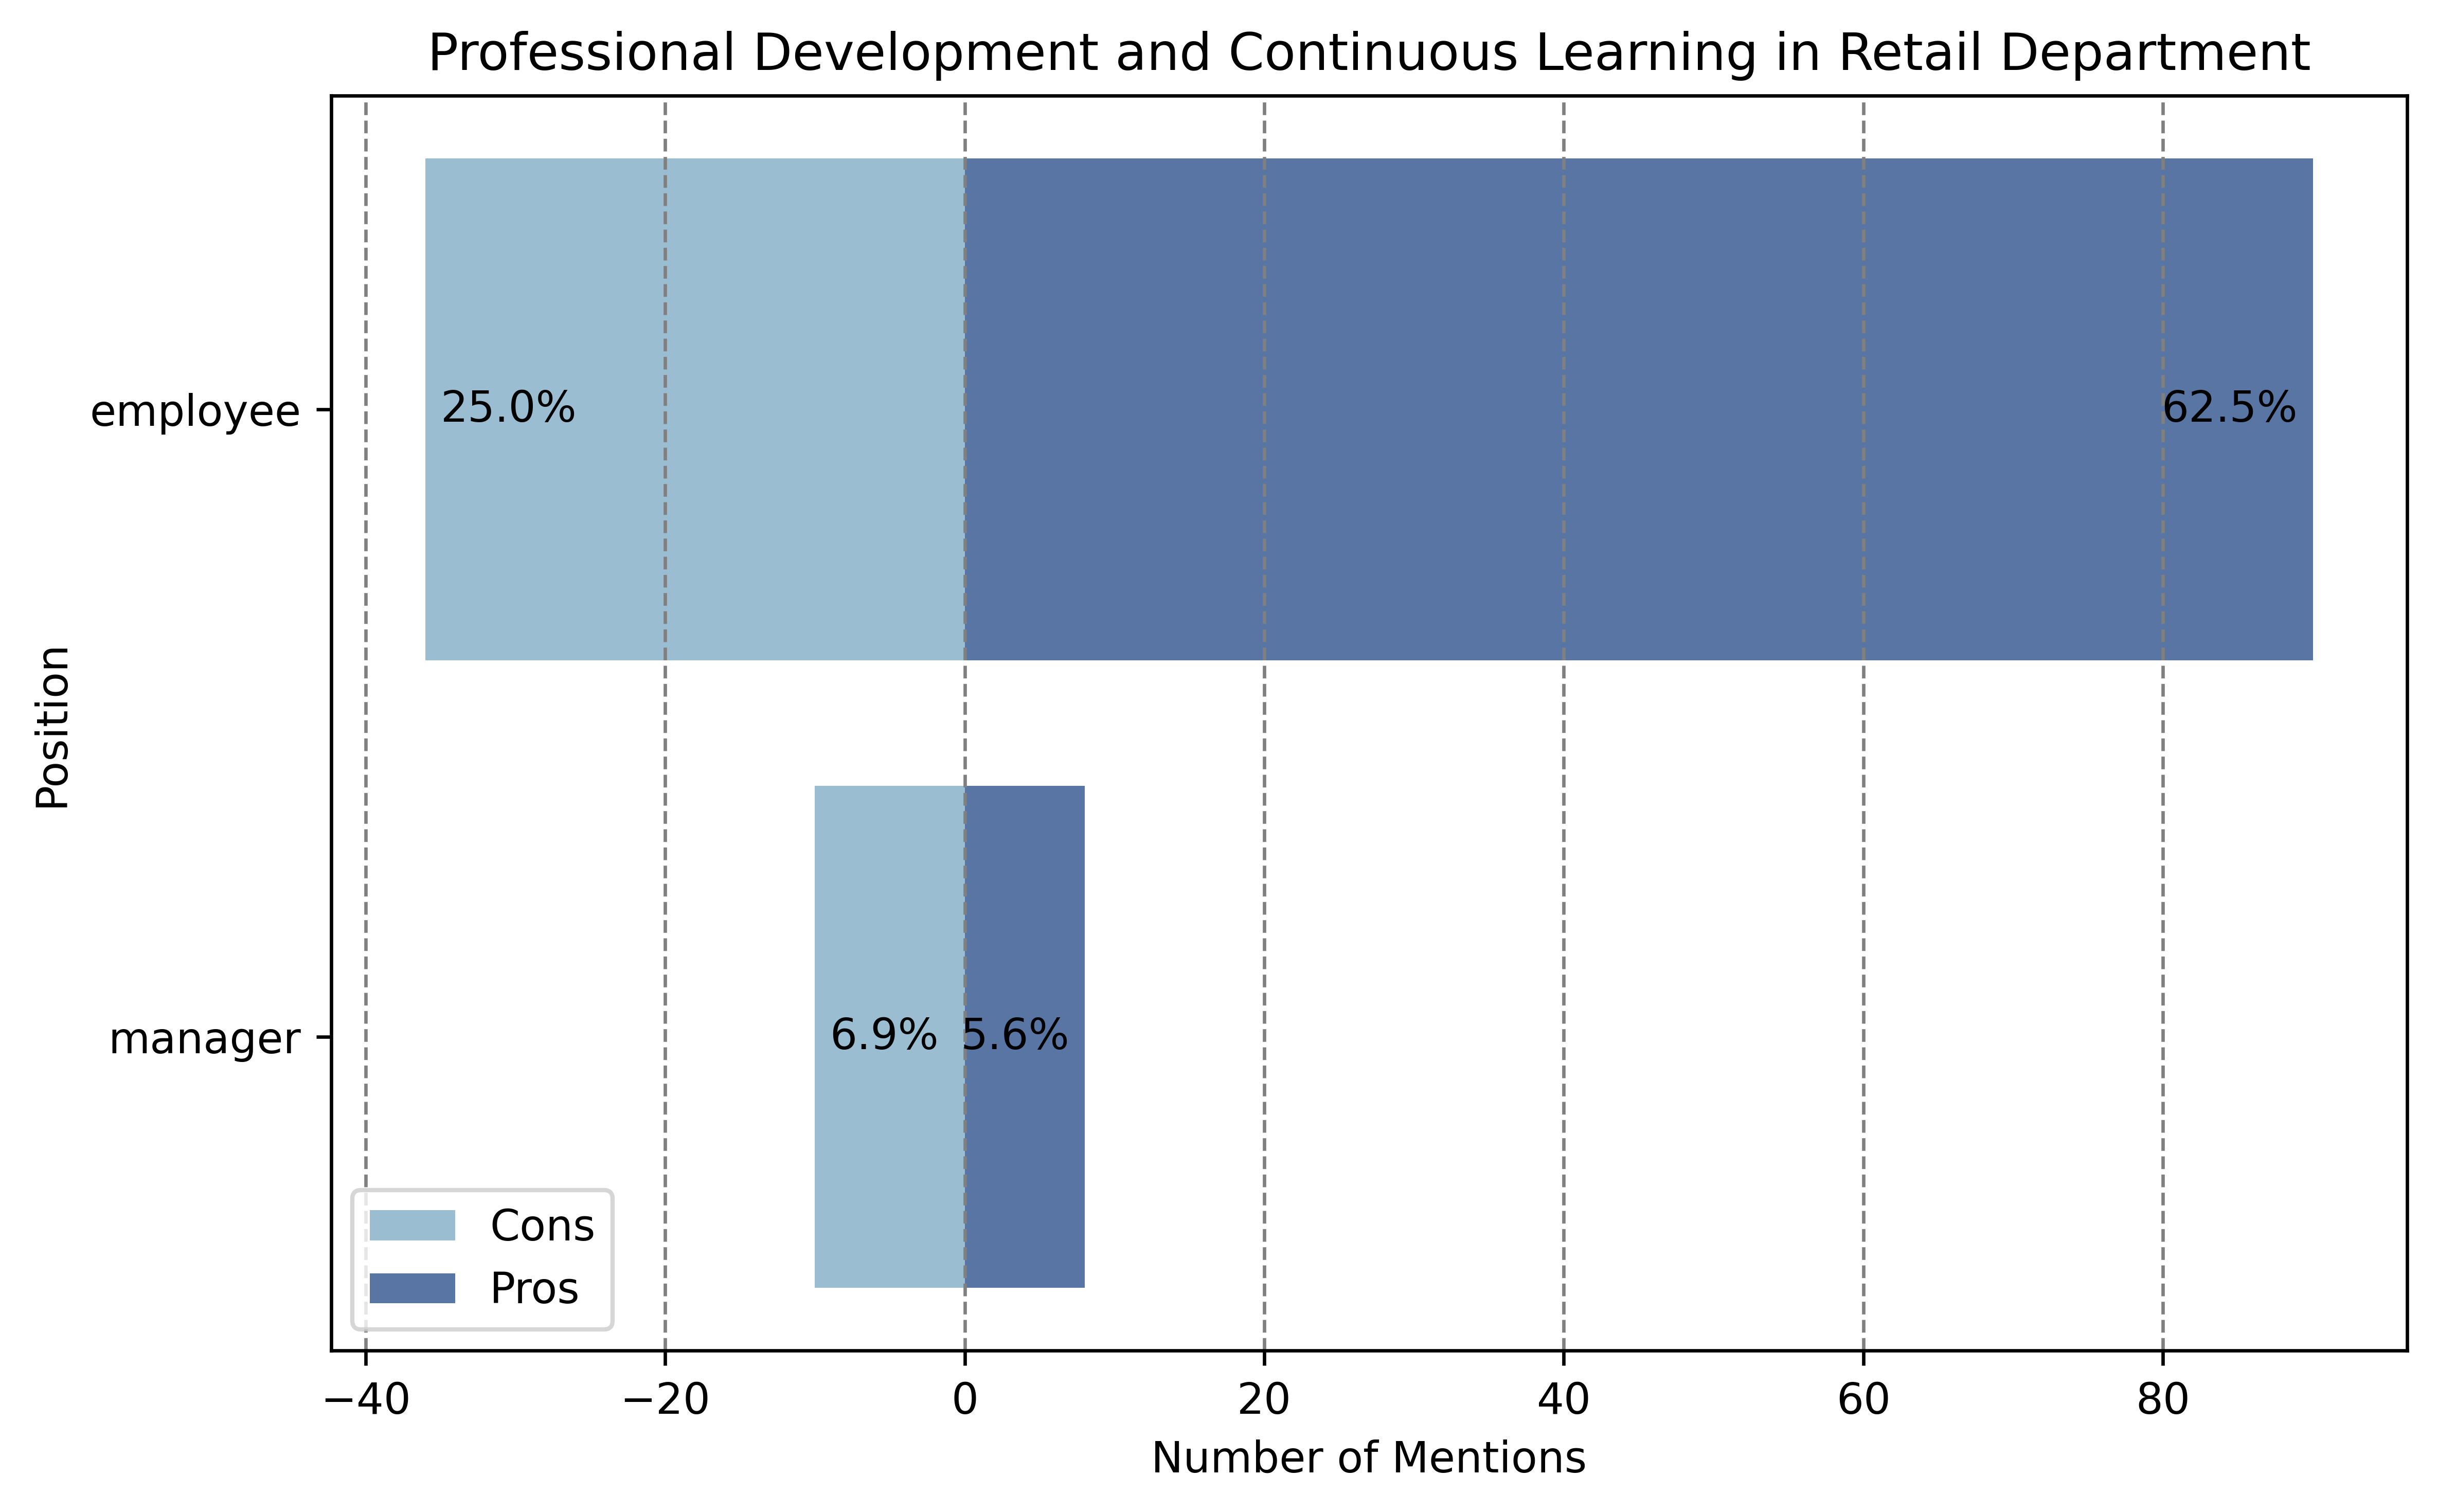

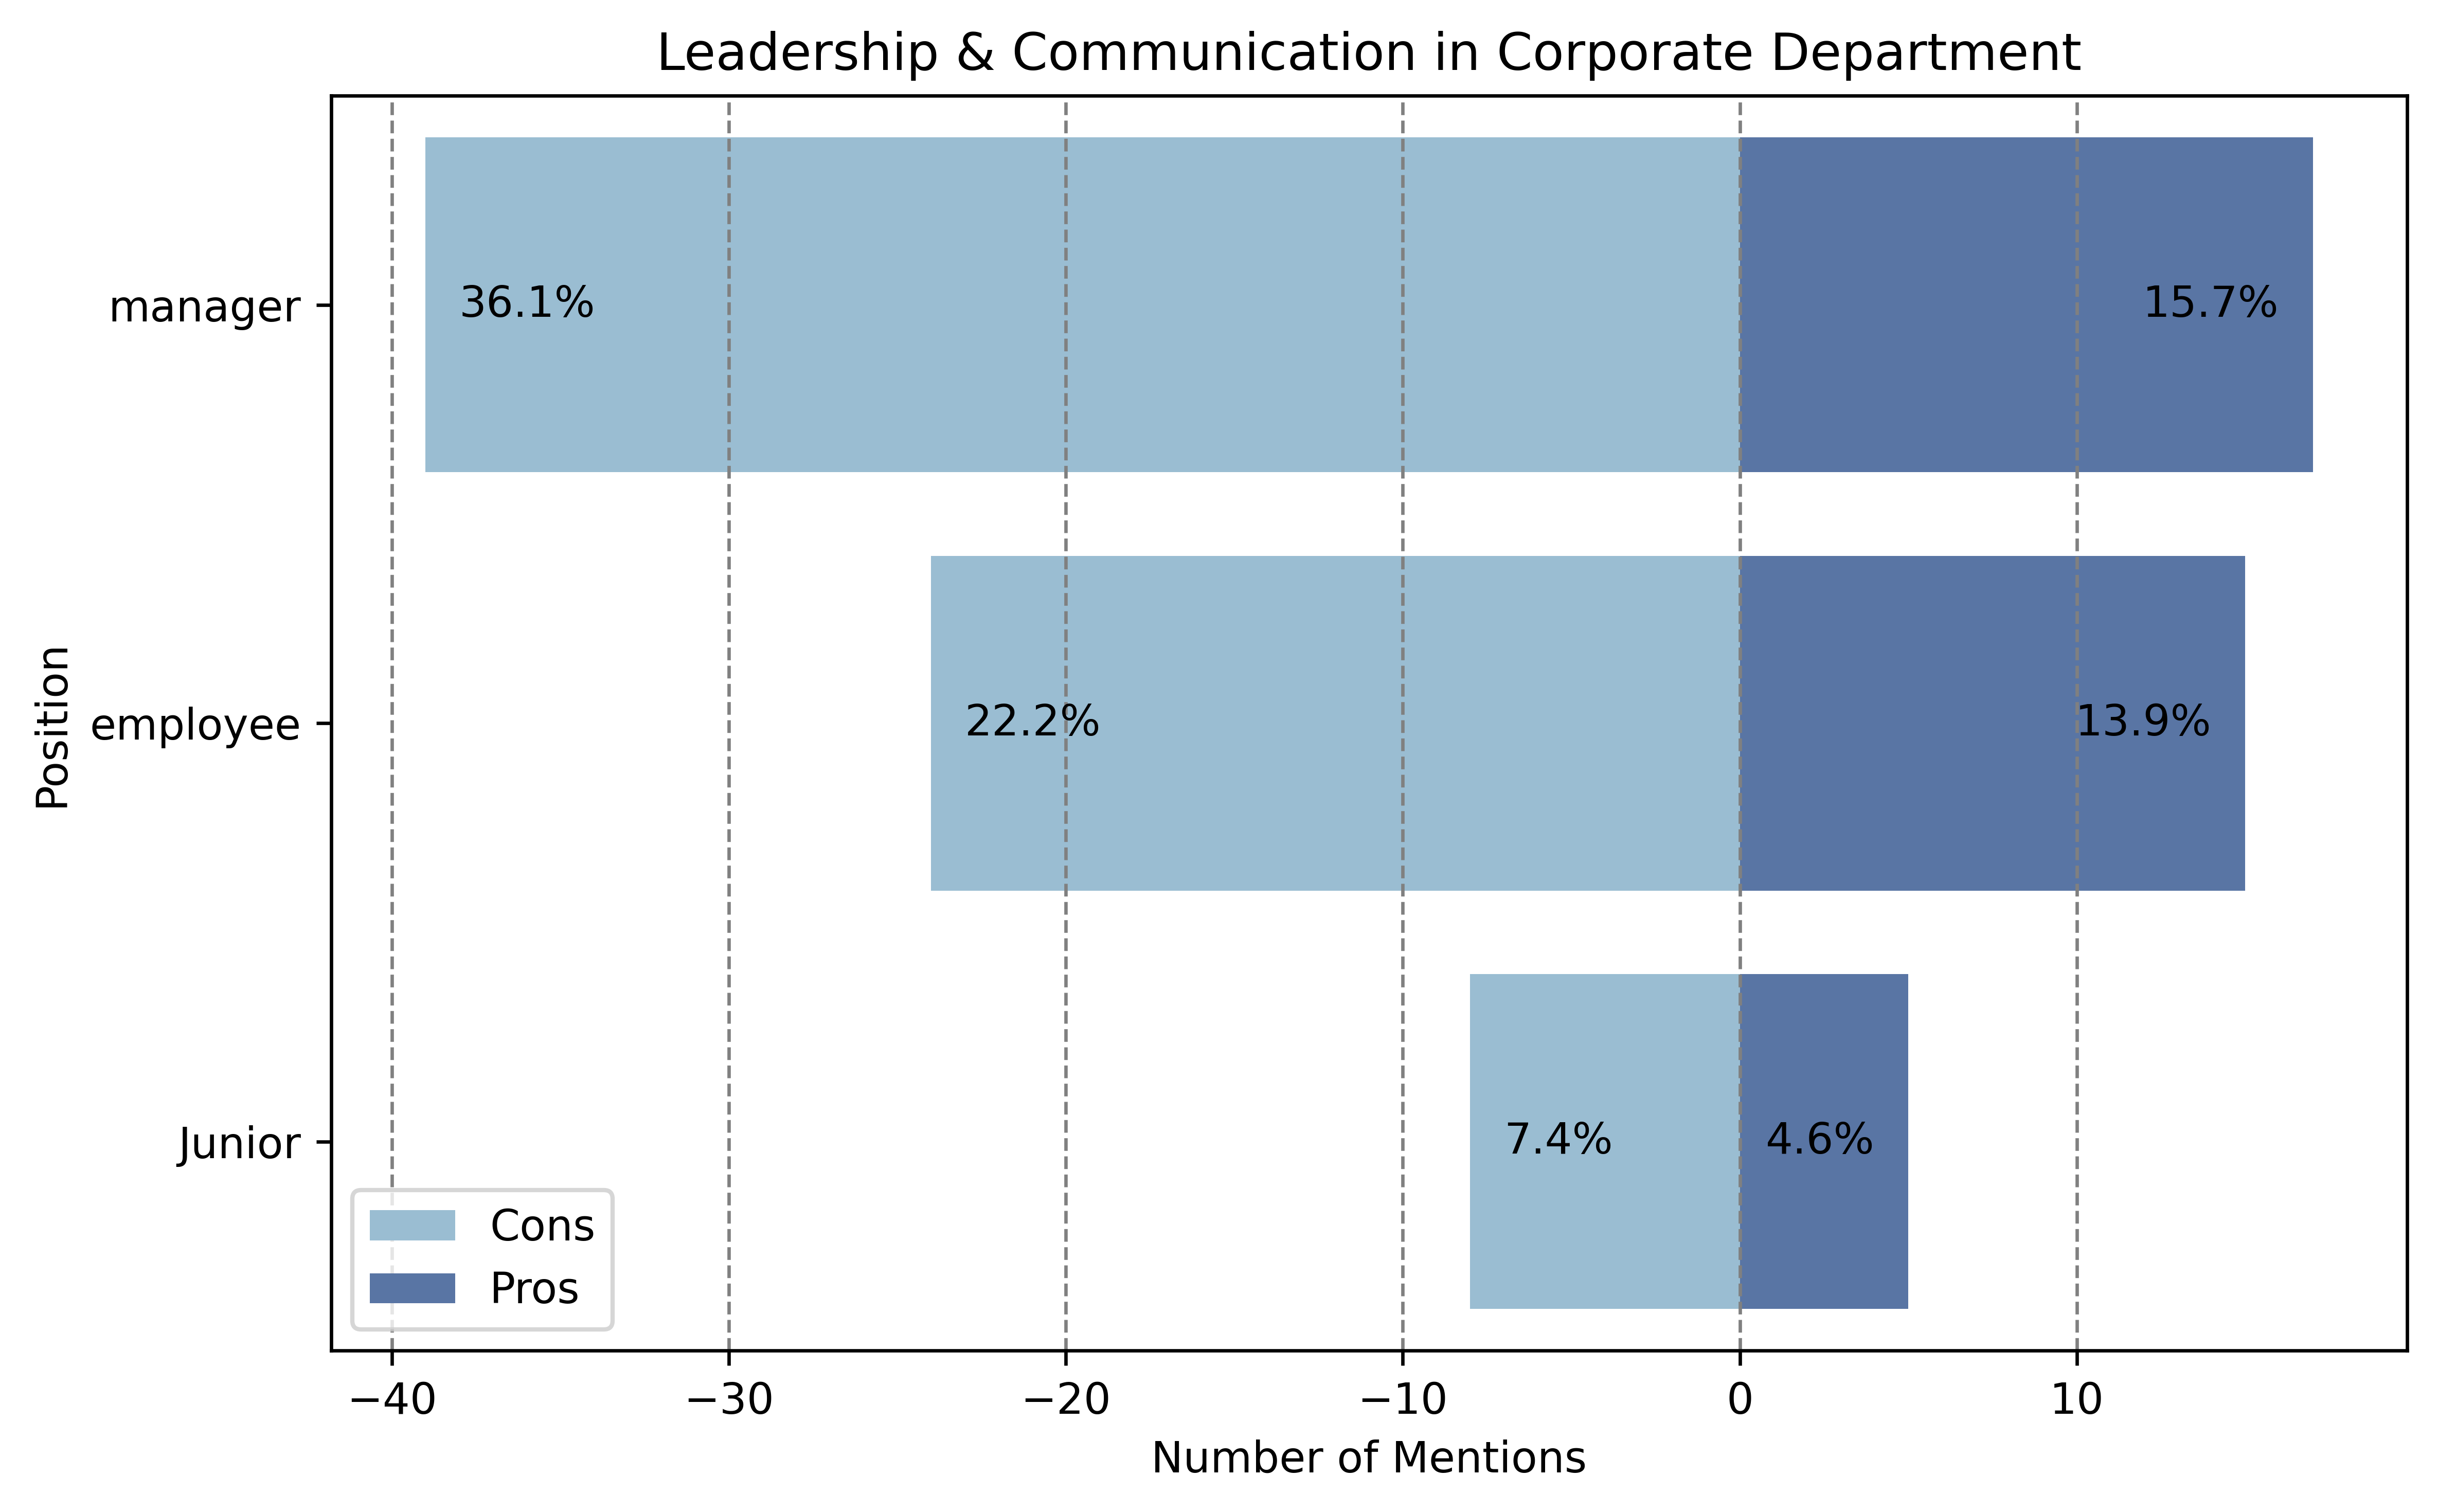

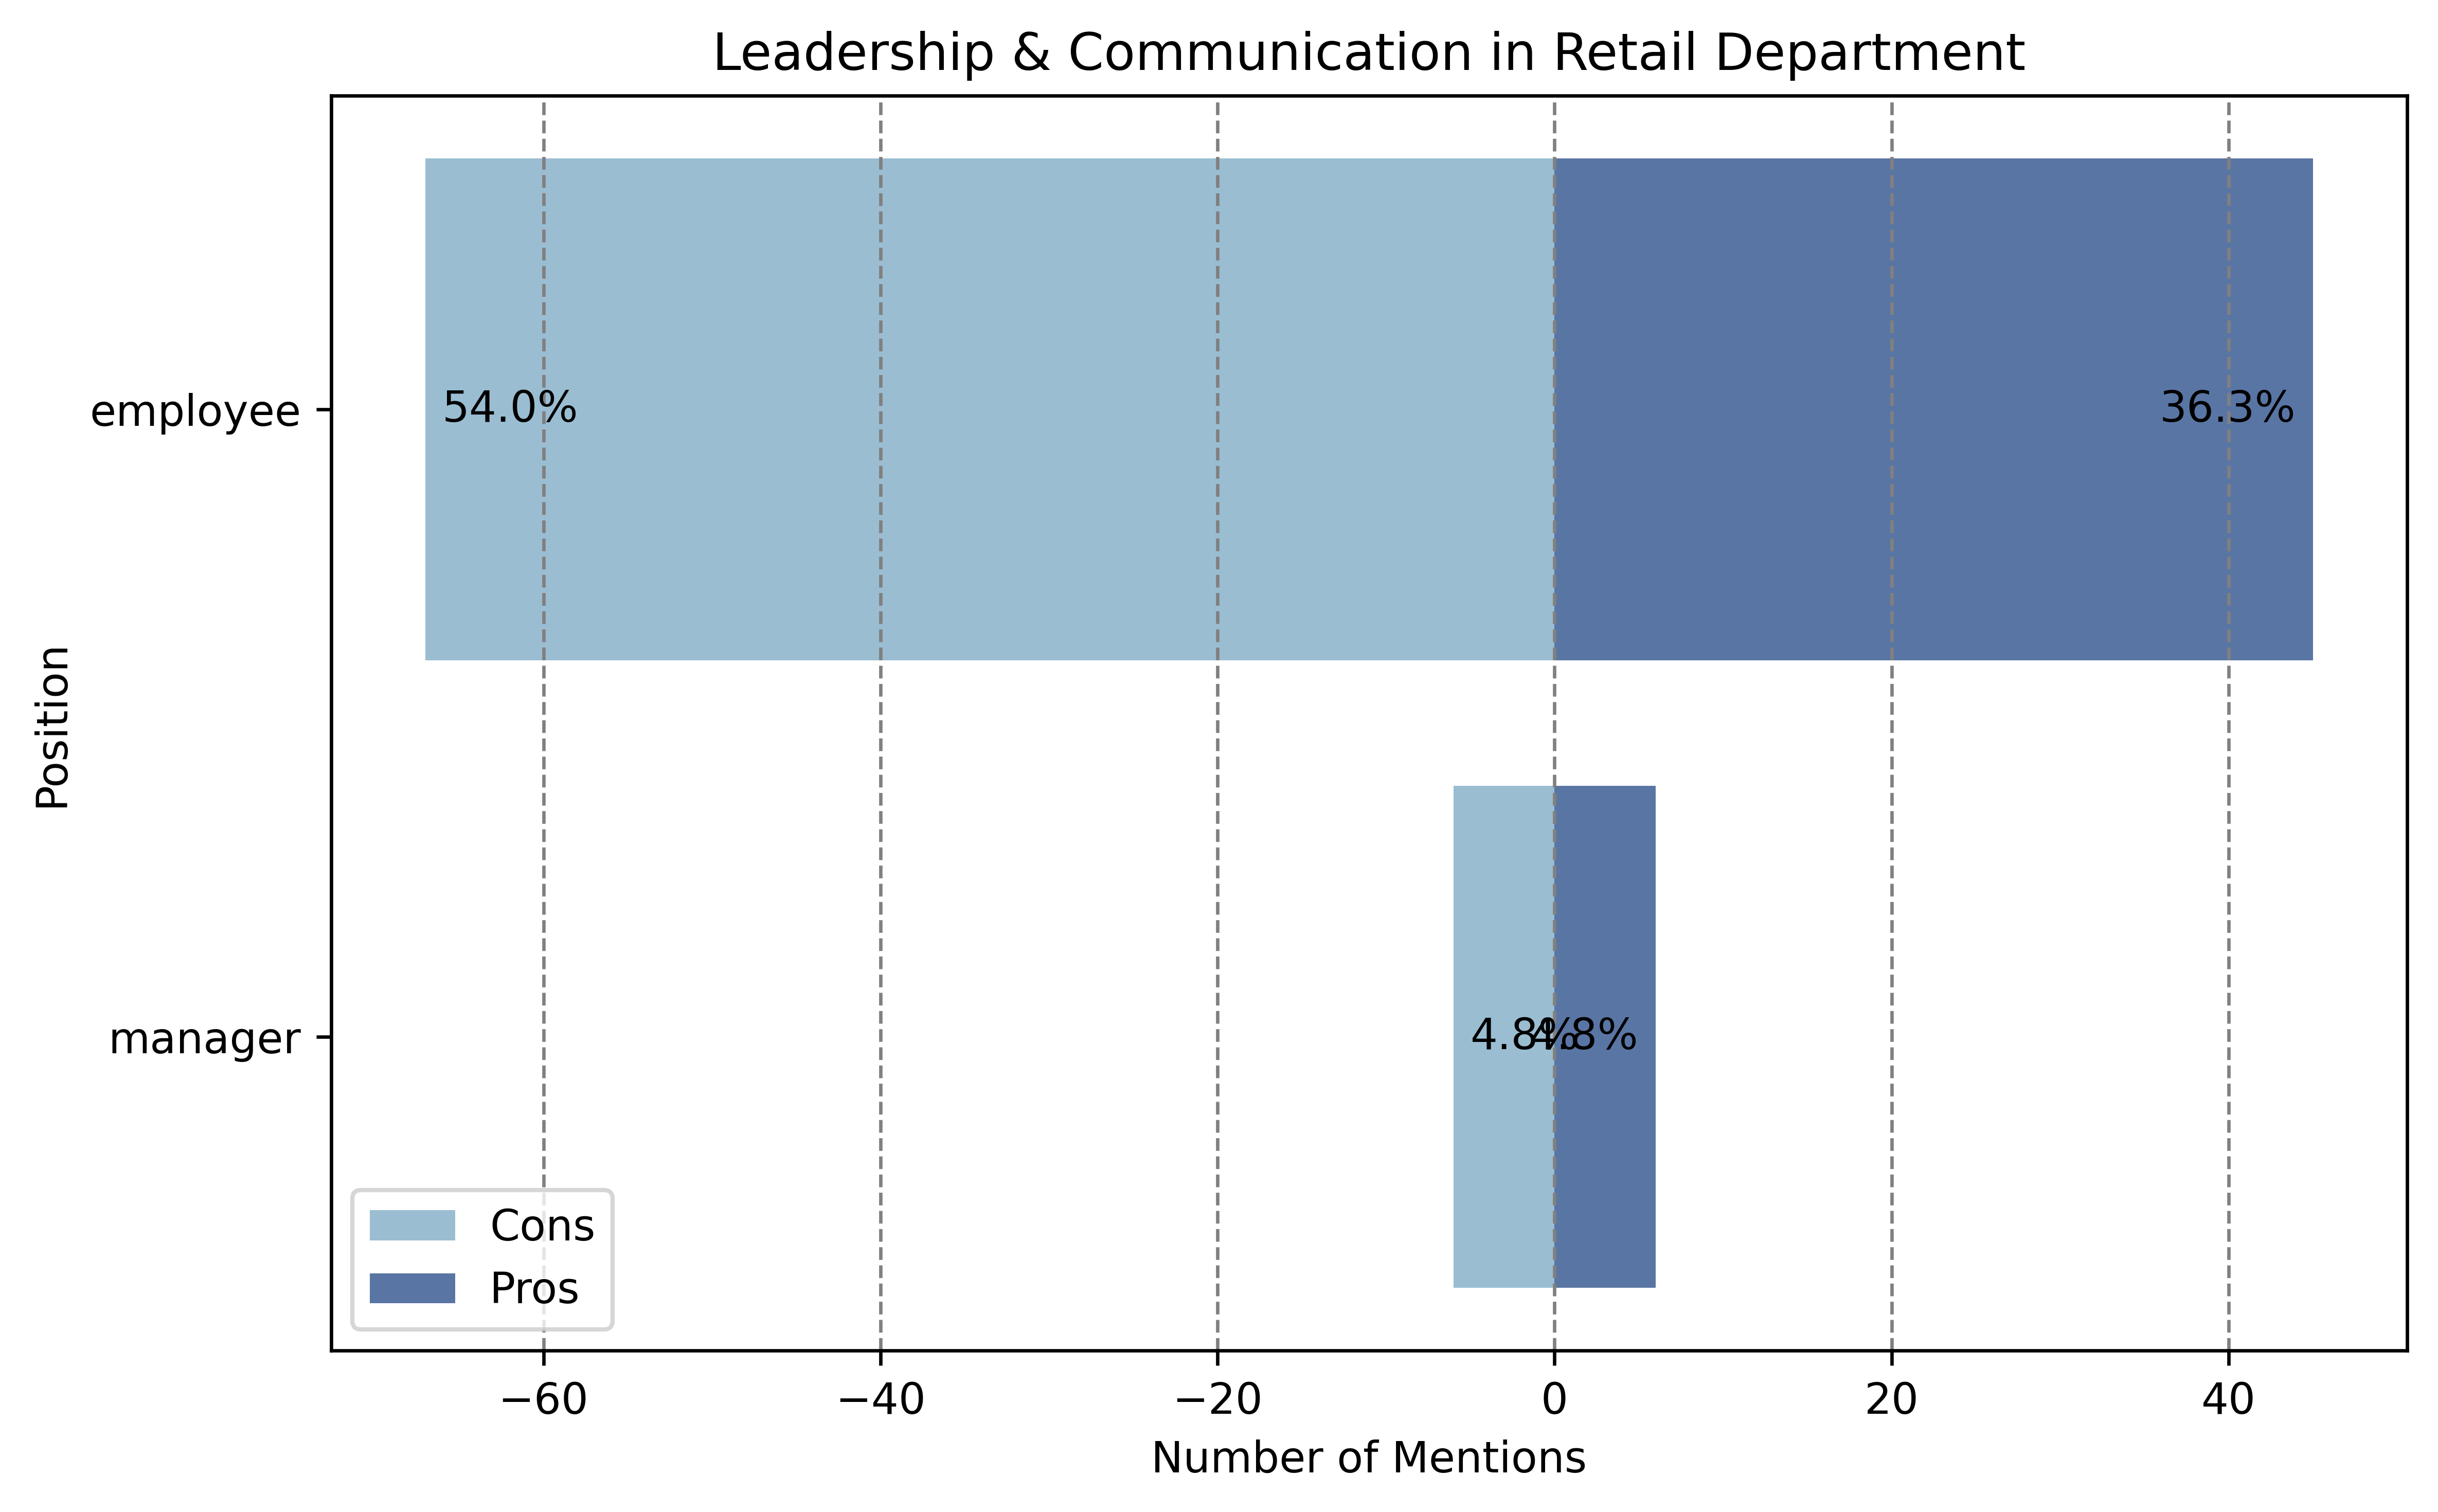

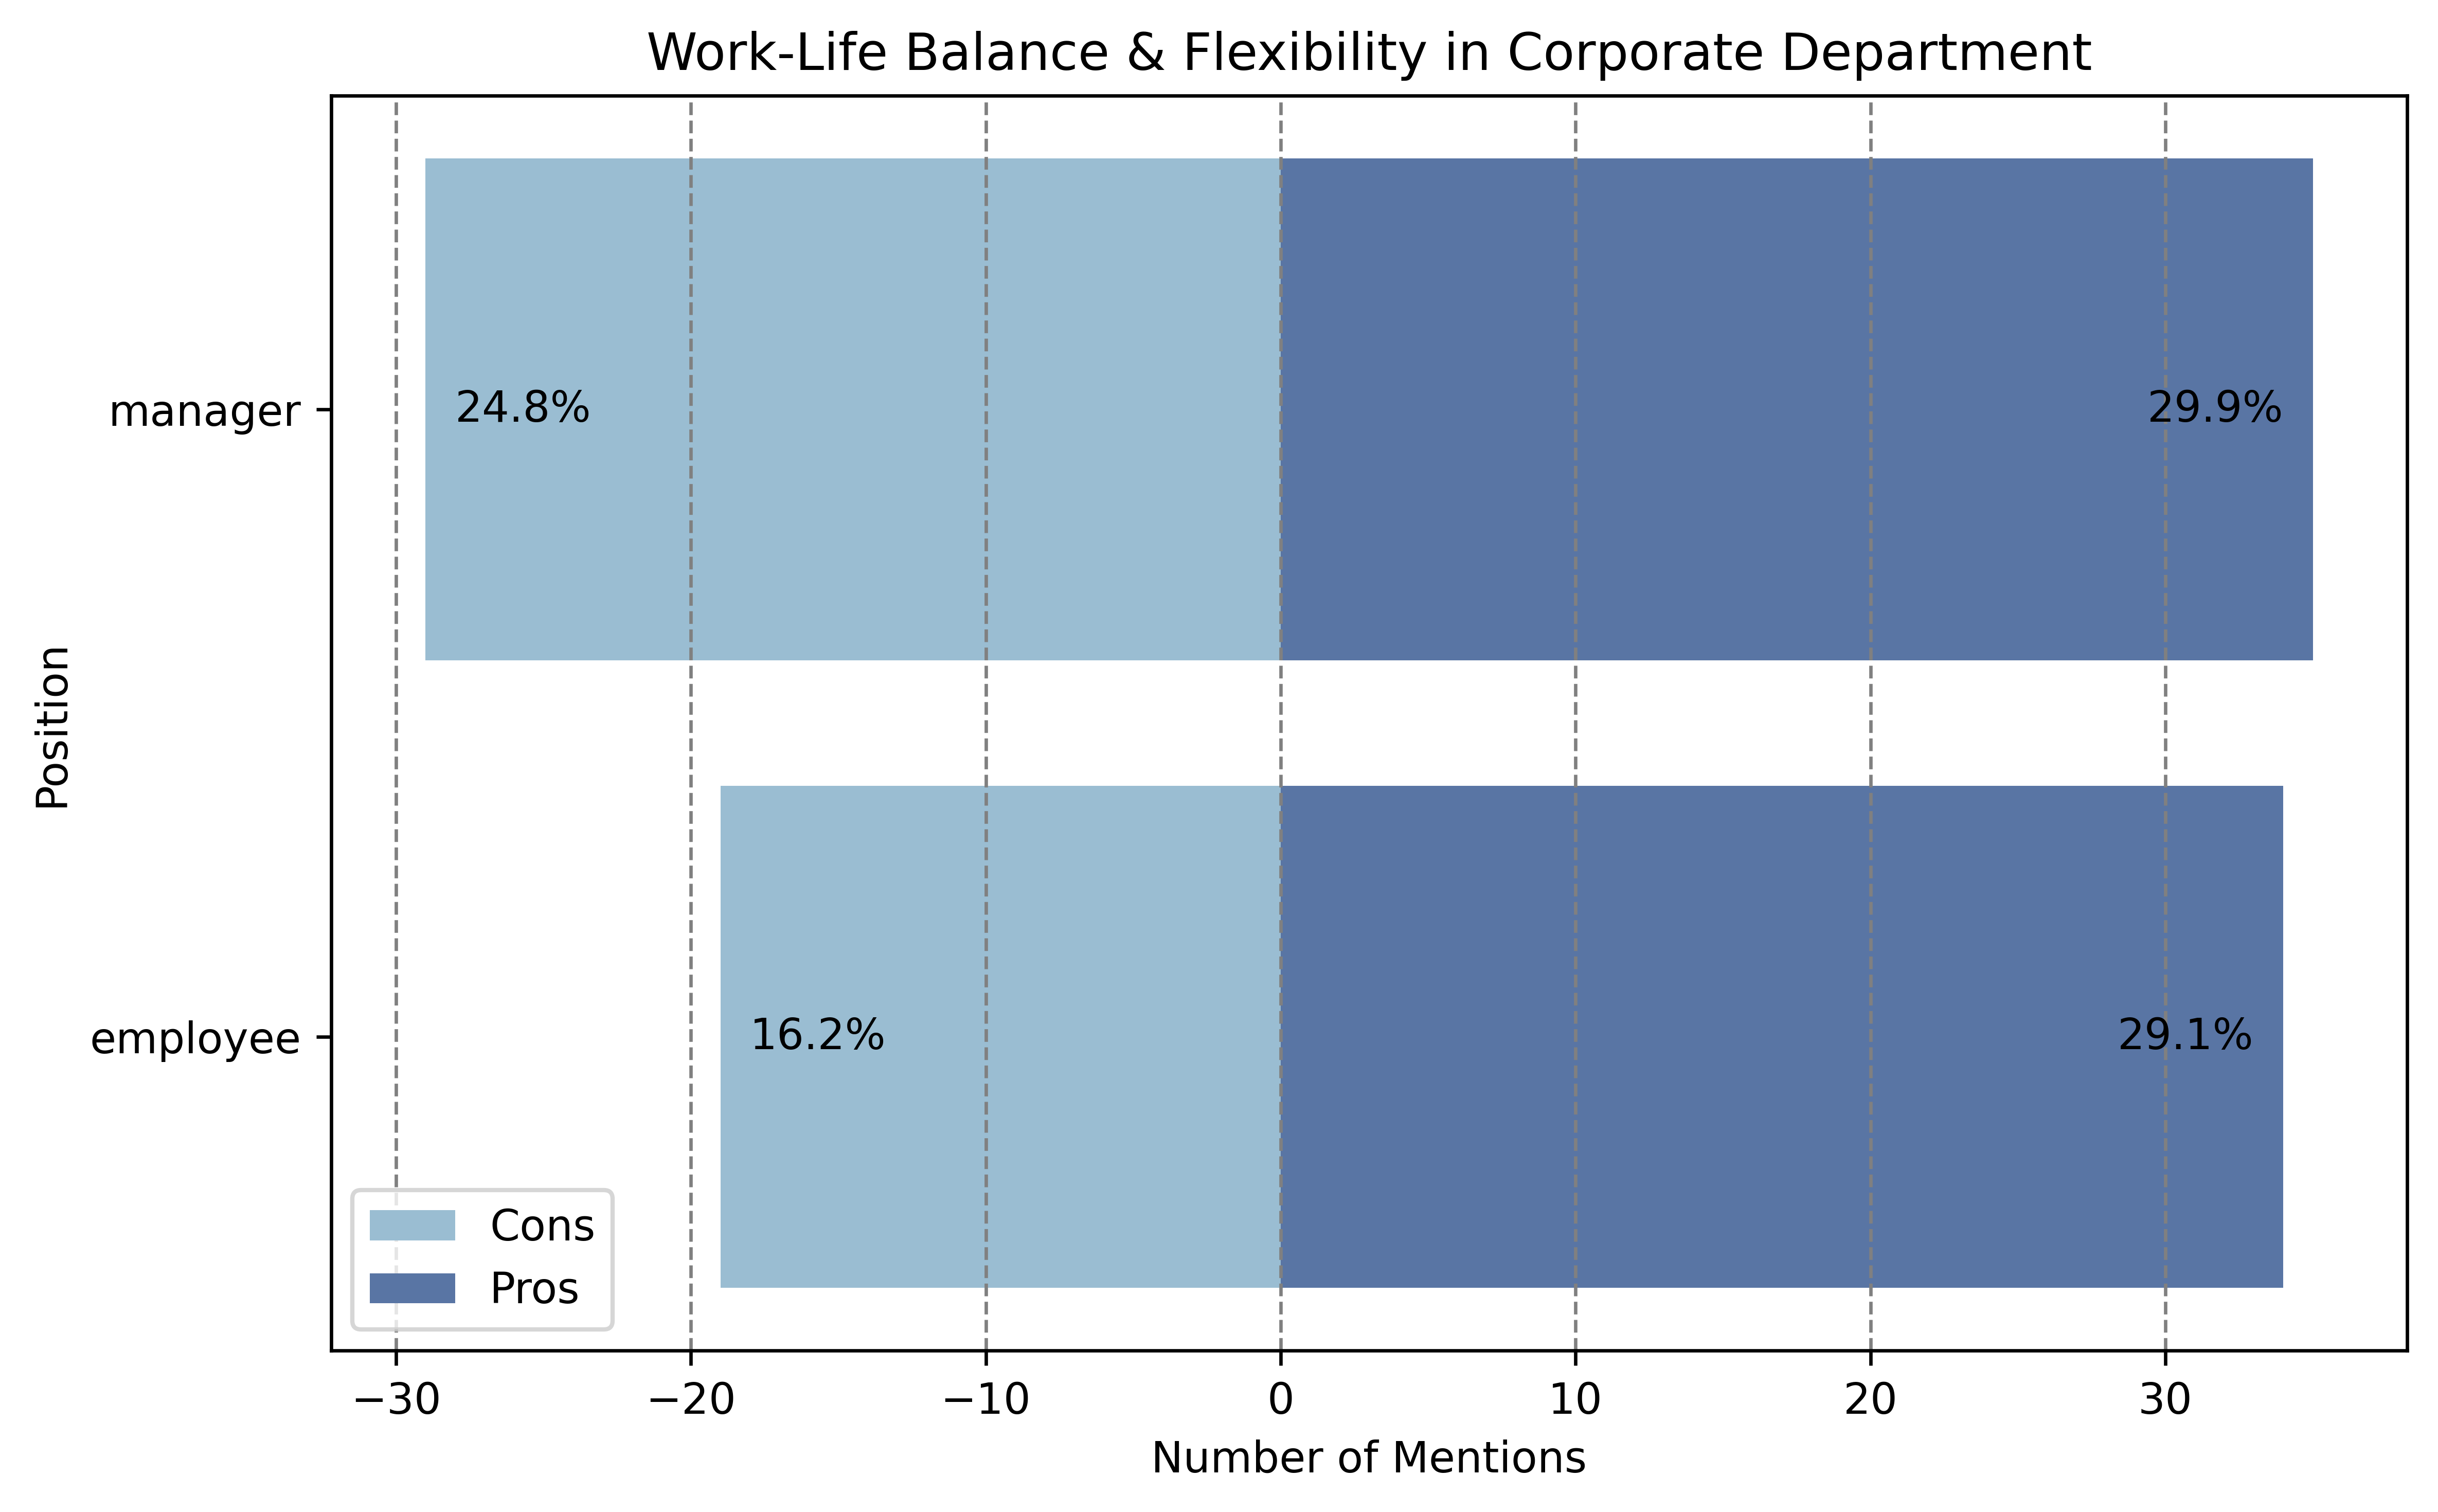

c:\Users\baner\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
c:\Users\baner\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


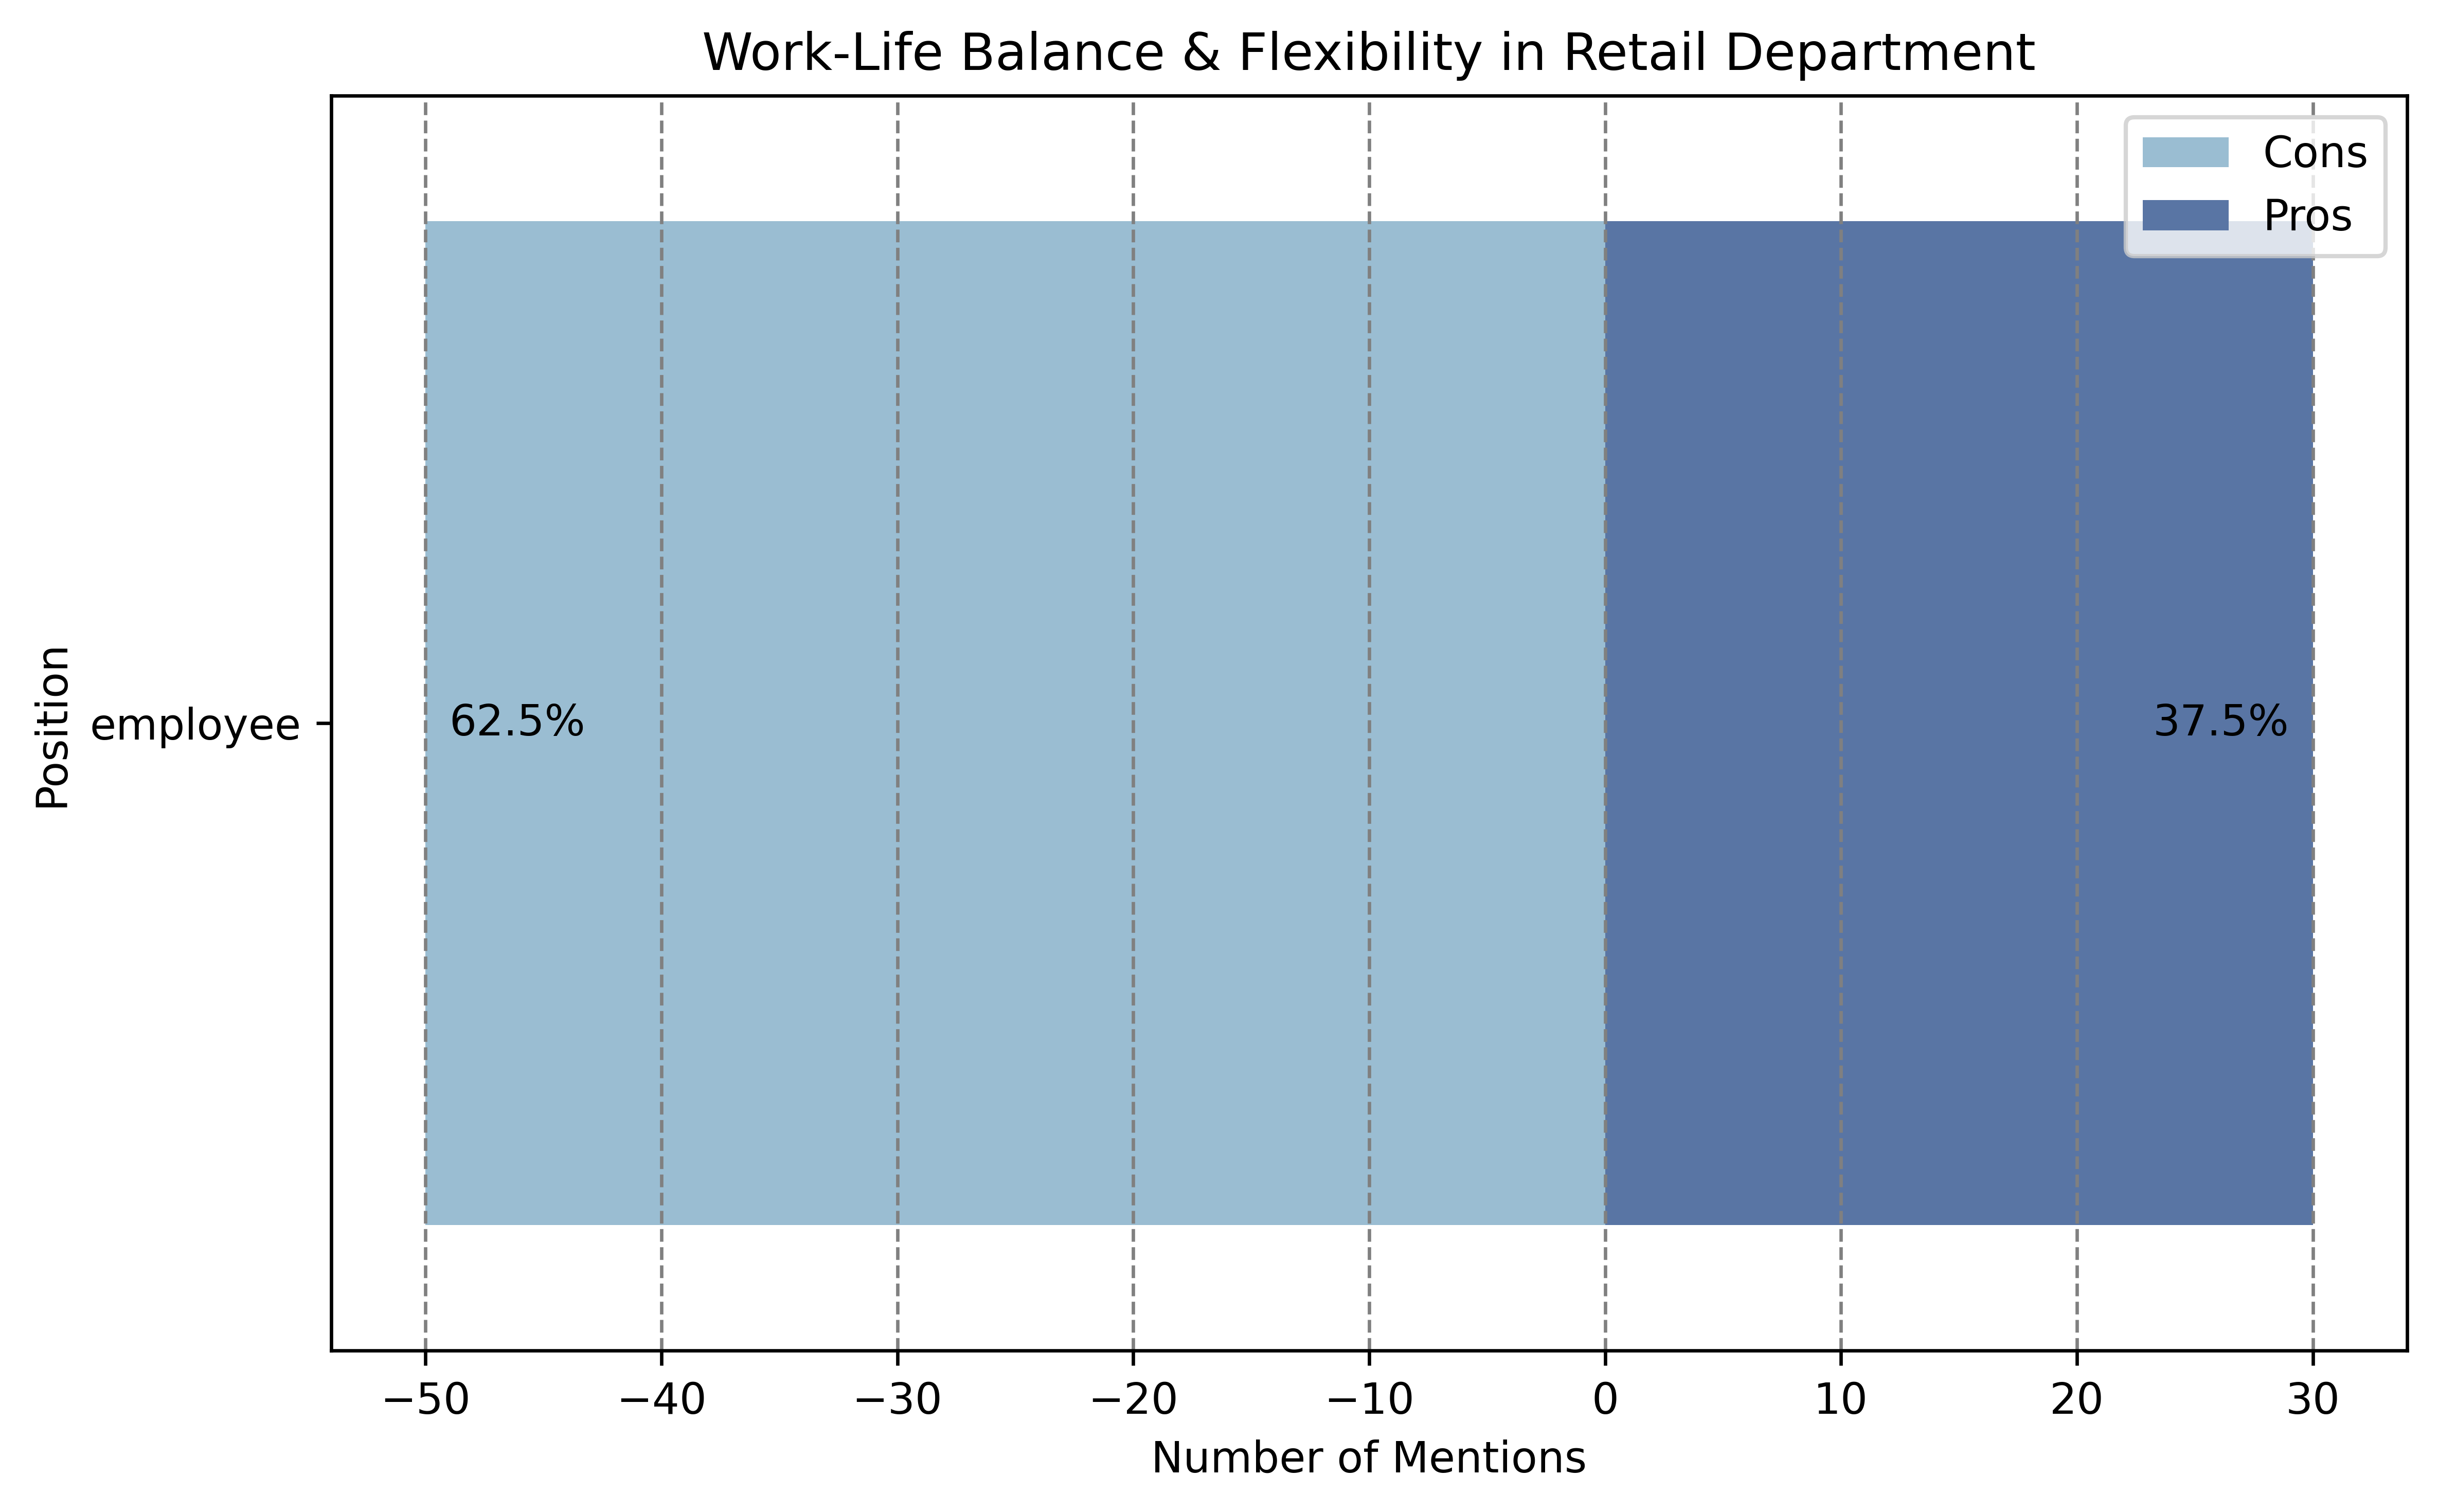

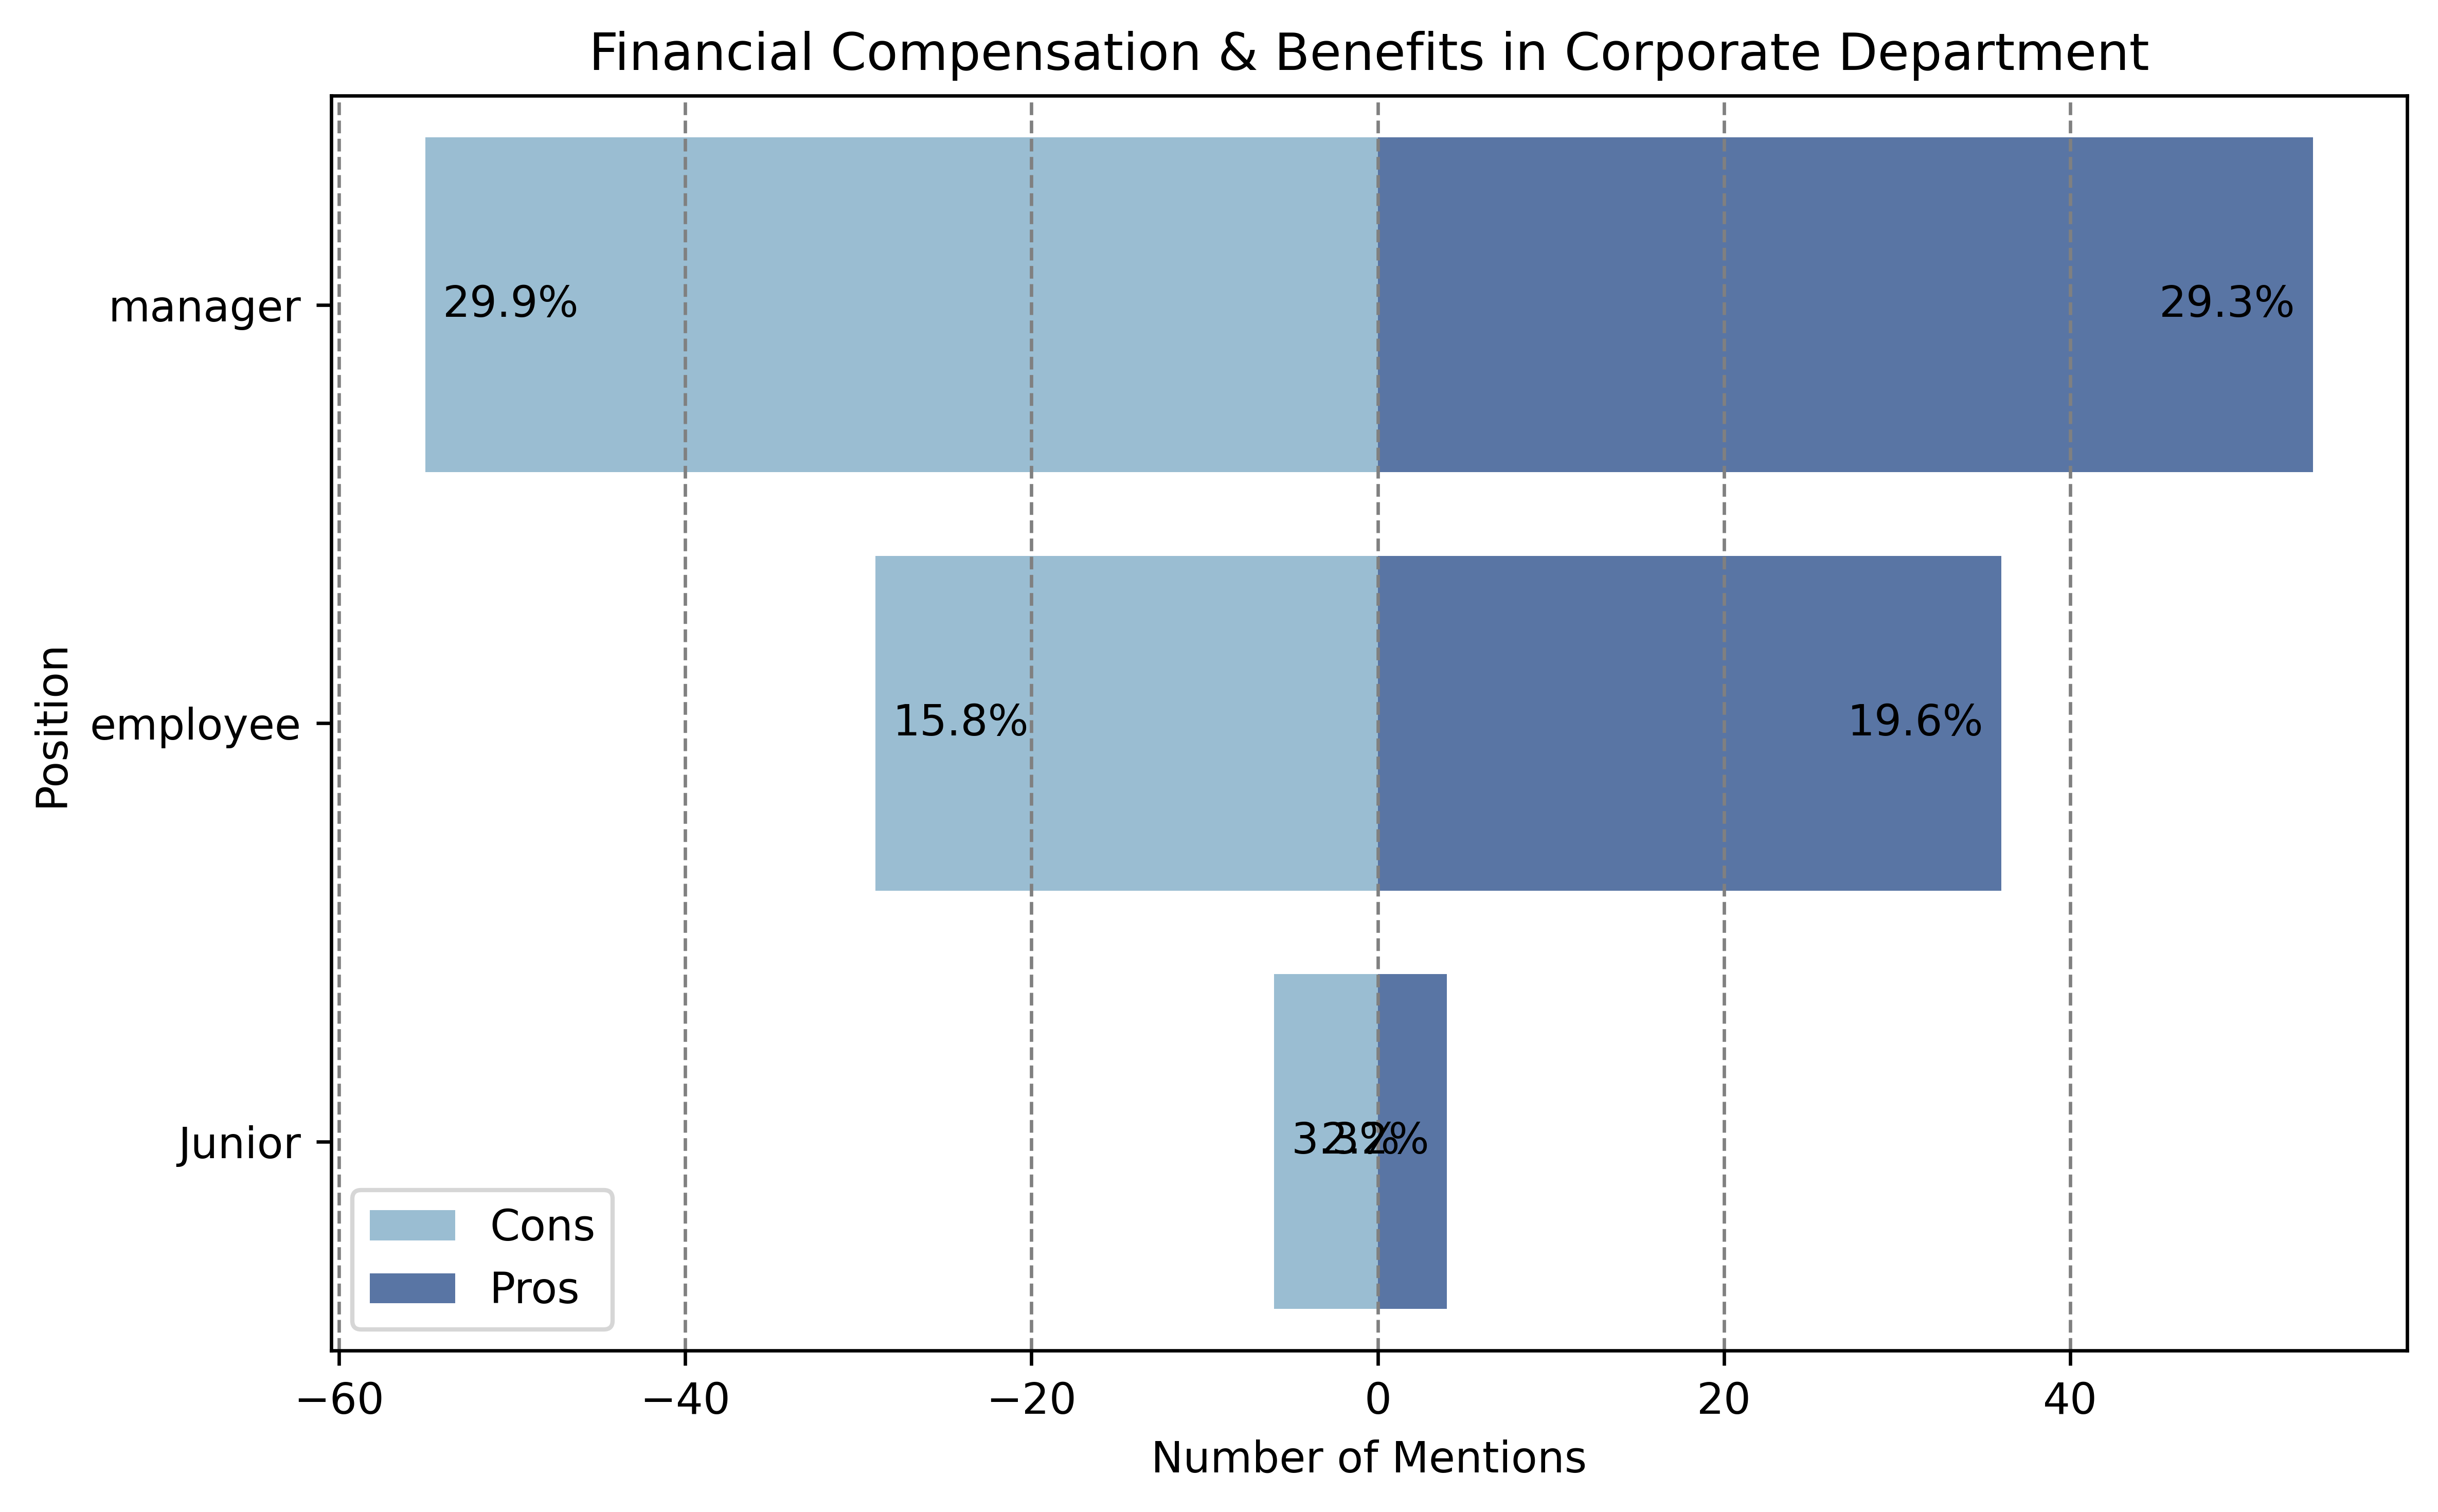

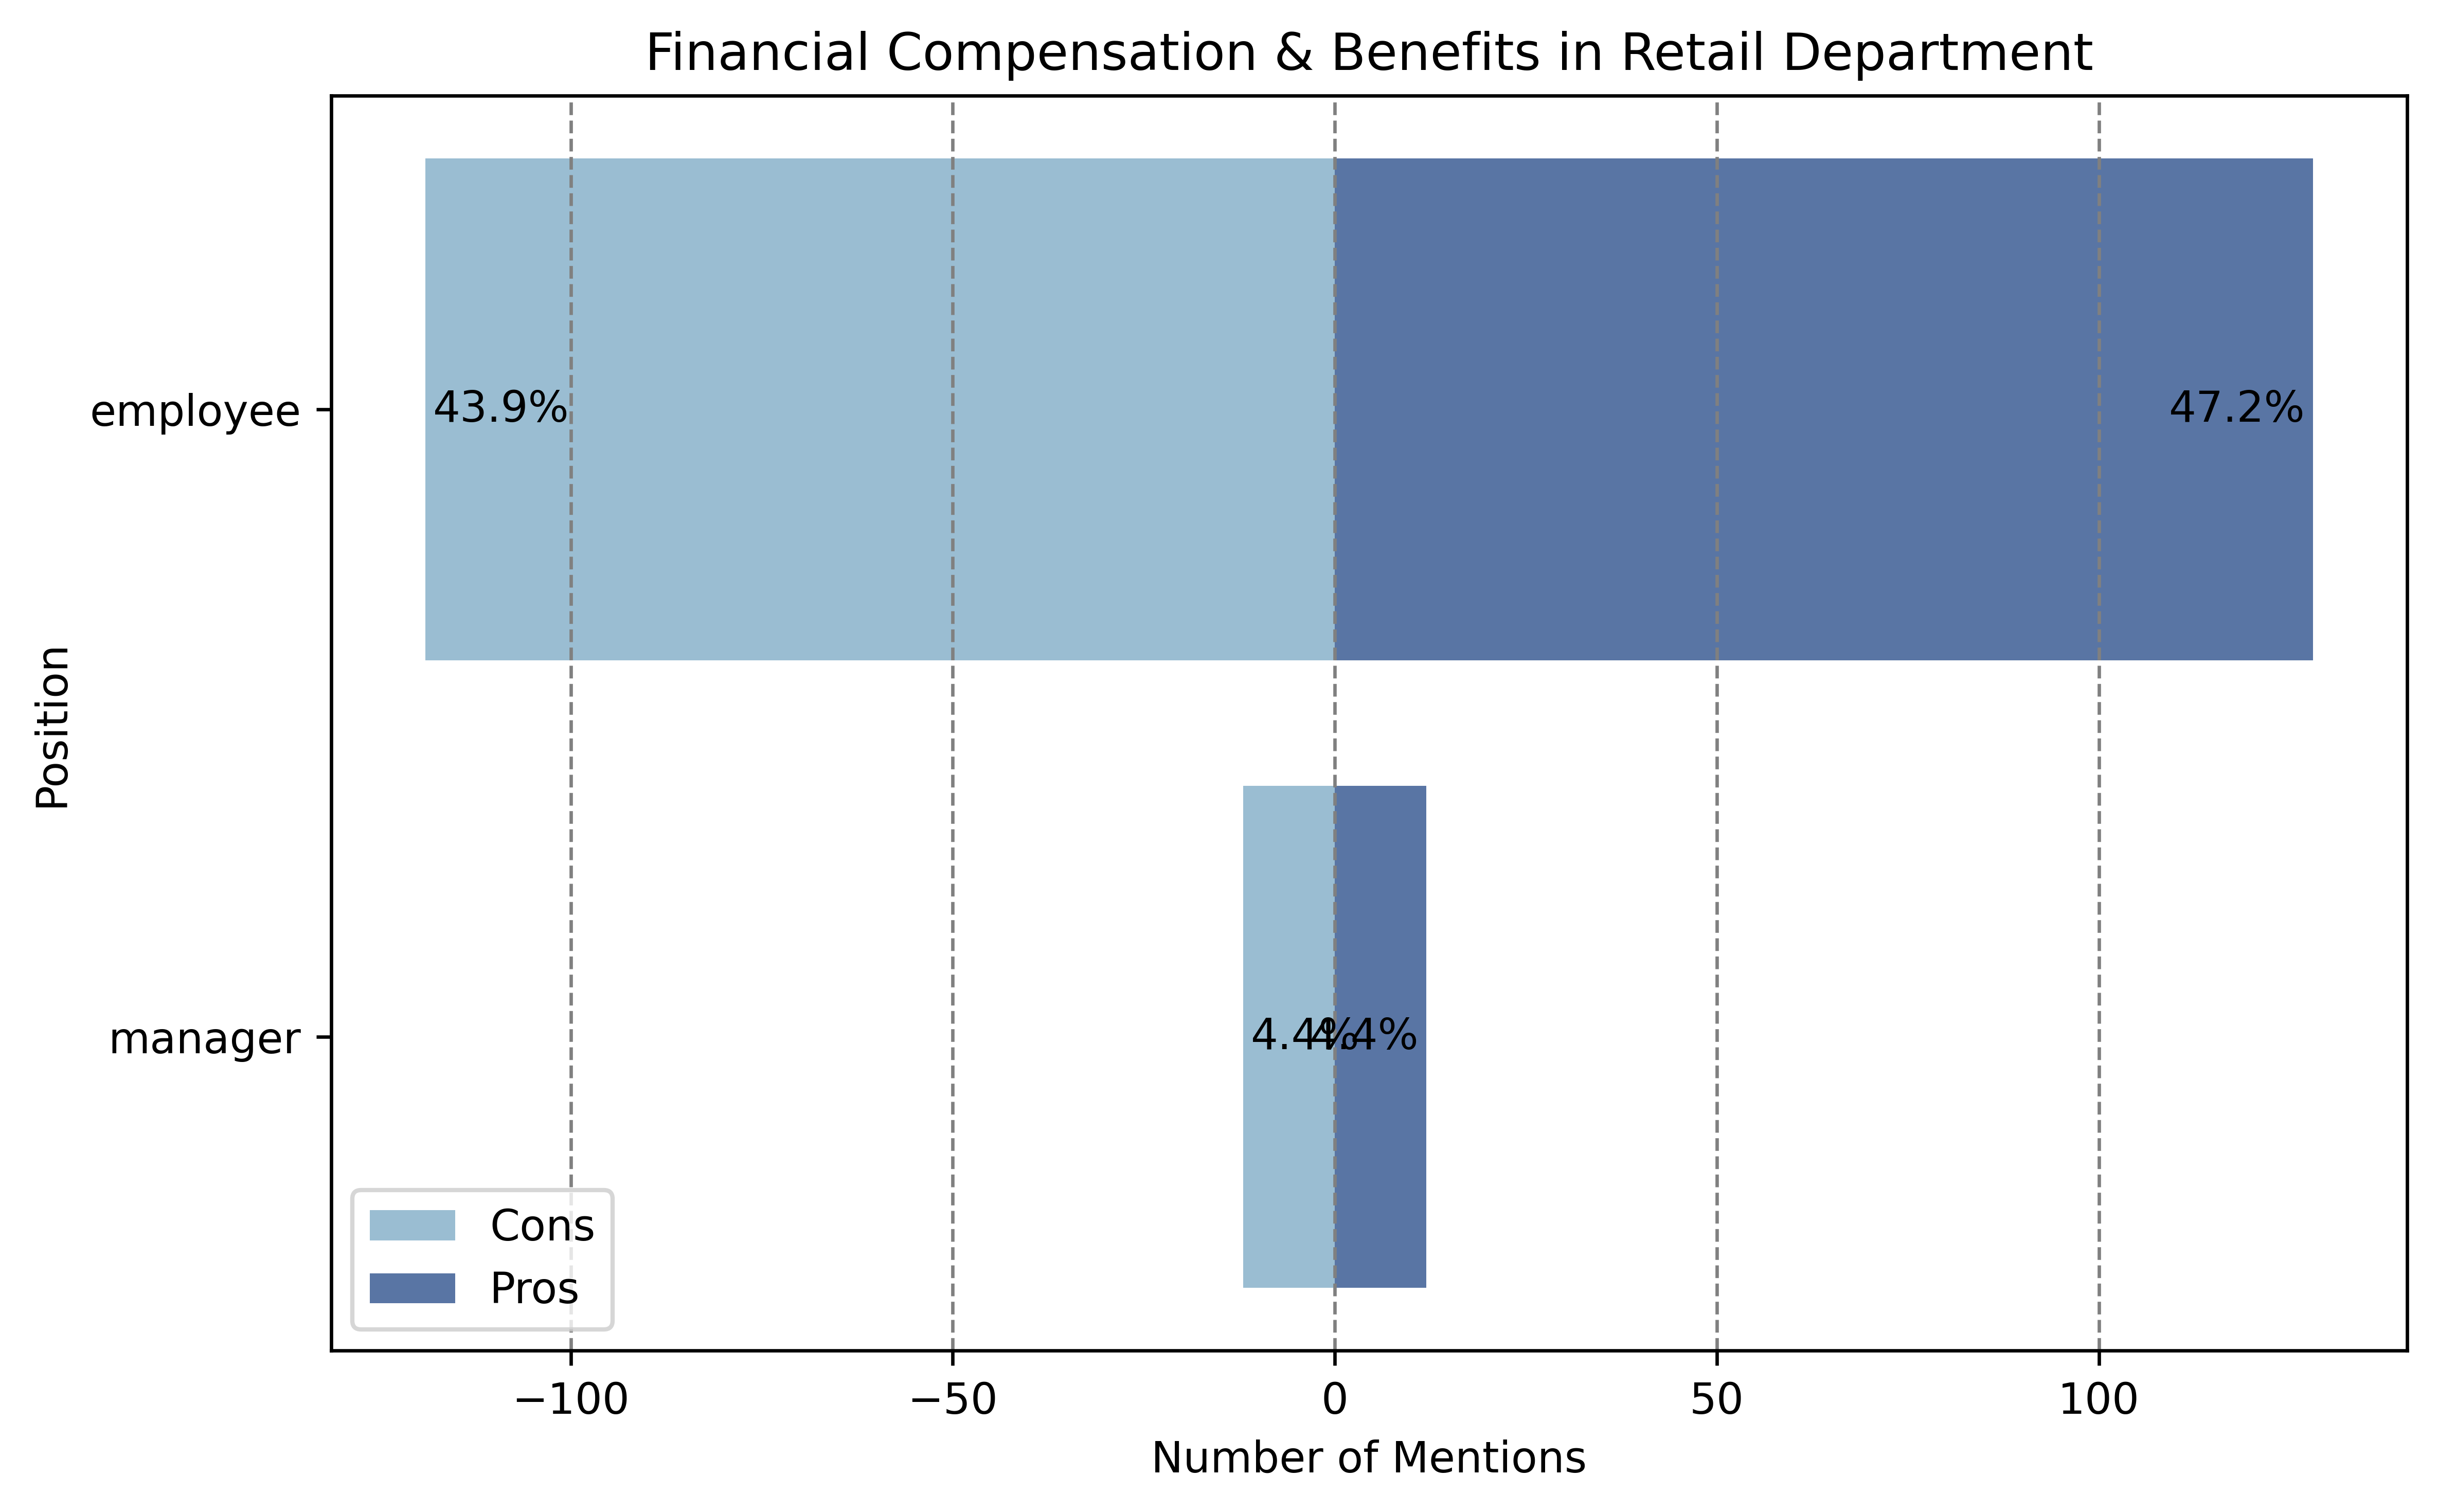

In [33]:
components = ['Collaboration & Teamwork & Social Culture', 'Professional Development and Continuous Learning', 'Leadership & Communication', 'Work-Life Balance & Flexibility', 'Financial Compensation & Benefits']
dept = ['Corporate', 'Retail']
for com in components:
    for de in dept:
        plot_divergent_pros_cons(
            reviews_pros, 
            reviews_cons, 
            category=com, 
            department=de, 
            mention_threshold=10# Adjust the threshold as needed
        )



### End of Notebook